#  **Семинар №5 Введение в нейронные сети**
#### 06.03.2024 Высоцкий С

## **Введение в `PyTorch`, установка и тензорное исчисление**
*See* https://pytorch.org

###**Установка** `PyTorch`

Мы будем использовать библиотеку для глубинного обучения `PyTorch`, ее можно не устанавливать, можно пользоваться сайтами [Kaggle](kaggle.com) и [Google Colab](colab.research.google.com/) для обучения в облаке (или с учителем?).

Чтобы установить `PyTorch` локально себе на компьютер нужно ответить на два вопроса - какая у вас операционная система и есть ли у вас дискретная видеокарта (GPU) и если есть, то какого производителя. В зависимости от ваших ответов мы получаем три варианта по операционной системе - Linux, Mac и Windows; три варианта по дискретной видеокарте - нет видеокарты (доступен только центральный процессор CPU), есть видеокарта от Nvidia или есть видеокарта от AMD (это производитель именно чипа, конечный вендор может быть другой, например, ASUS, MSI, Palit). Работа с PyTorch с видеокартой от AMD это экзотика, которая выходит за рамки нашего курса, поэтому рассмотрим только варианты *нет видеокарты*/*есть видеокарта от Nvidia*.


Выберите на [сайте](https://pytorch.org/get-started/locally/) подходящие вам варианты операционной системы/видеокарты и скопируйте команду для установки. Разберем подробно самые популярные варианты установки:

**Установка в Linux** ([поддерживаемые дистрибутивы](https://pytorch.org/get-started/locally/#supported-linux-distributions))

На линуксе будет работать поддержка `PyTorch` в любой конфигурации, что у вас нет видеокарты, что есть от Nvidia, что от AMD.

Пререквизит для работы с видеокартой от Nvidia - нужно поставить CUDA, это инструмент от компании Nvidia, который позволяет ускорять вычисления на их же ГПУ. Чтобы поставить себе на машину все правильно воспользуйтесь этим [гайдом](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html) от Nvidia.

 - **pip**

`pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu` для тех, у кого нет видеокарты.

`pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118` для тех, у кого есть видеокарта (либо другой `--extra-index-url`, смотрите на сайте PyTorch, в зависимости от версии CUDA).

 - **conda**

`conda install pytorch torchvision torchaudio cpuonly -c pytorch` для тех, у кого нет видеокарты.

`conda install pytorch torchvision torchaudio cudatoolkit=11.8 -c pytorch -c conda-forge` для тех, у кого есть видеокарта (либо немного другая команда, в зависимости от версии CUDA).

**Установка в Windows**

На винде будет работать поддержка `PyTorch` только для видеокарт от Nvidia и без видеокарт вообще.

Пререквизит для работы с видеокартой от Nvidia - нужно поставить CUDA, это инструмент от компании Nvidia, который позволяет ускорять вычисления на их же ГПУ. Чтобы поставить себе на машину все правильно воспользуйтесь этим [гайдом](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html) от Nvidia.

 - **pip**

`pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu` для тех, у кого нет видеокарты.

`pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118` для тех, у кого есть видеокарта (либо другой `--extra-index-url`, смотрите на сайте PyTorch, в зависимости от версии CUDA).

 - **conda**

`conda install pytorch torchvision torchaudio cpuonly -c pytorch` для тех, у кого нет видеокарты.

`conda install pytorch torchvision torchaudio cudatoolkit=11.8 -c pytorch -c conda-forge` для тех, у кого есть видеокарта (либо немного другая команда, в зависимости от версии CUDA).



**Установка на Mac**

На маках есть поддержка `PyTorch` как на CPU, так и на GPU, но только для Apple Silicon, то есть на чипах M1, M2 и так далее.

При этом поддержка ускорения с помощью GPU есть только для версий макоси выше 12.3: MPS acceleration is available on MacOS 12.3+

 - **pip**

`pip3 install torch torchvision torchaudio`

 - **conda**

`conda install pytorch::pytorch torchvision torchaudio -c pytorch`

###**Введение в** `PyTorch`



**Тензоры (tensor)** — *это "массивы в `PyTorch`" специализированная структура данных, по сути это массивы и матрицы. Тензоры очень похожи на массивы в numpy, так что, если у вас хорошо с numpy, то разобраться в PyTorch тензорах будет очень просто.*

*В PyTorch мы используем тензоры для кодирования входных и выходных данных модели, а также параметров модели.*

*See* https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

In [1]:
import torch
import numpy as np

import matplotlib.pyplot as plt

##### **Создание тензоров**



*Тензор можно создать напрямую из каких-то данных - нам подходят все списки с числами:*

In [2]:
some_data = [1, 2, 3, 4]
some_tensor = torch.tensor(some_data)

some_tensor

tensor([1, 2, 3, 4])

In [3]:
some_data = [[1, 2], [3, 4], [5, 6]]
some_tensor = torch.tensor(some_data)

some_tensor

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [4]:
some_data = [[[1], [2]], [[3], [4]], [[5], [6]]]
some_tensor = torch.tensor(some_data)

some_tensor

tensor([[[1],
         [2]],

        [[3],
         [4]],

        [[5],
         [6]]])

**На самом деле про "все" списки с числами - обман. Если у вашего списка есть какой-то уровень вложенности, то должны совпадать размерности у всех вложенных списков (подробнее про размерности поговорим позже):**

In [5]:
some_other_data = [[1, 2], [3, 4], [5, 6, 7]]
some_other_tensor = torch.tensor(some_other_data)

some_other_tensor

ValueError: expected sequence of length 2 at dim 1 (got 3)

In [6]:
torch.cuda.is_available()

True

*Также тензоры можно создавать из numpy массивов и наоборот:*

In [8]:
# to numpy
some_numpy_array1 = np.array(some_data)

some_numpy_array1

array([[[1],
        [2]],

       [[3],
        [4]],

       [[5],
        [6]]])

In [9]:
# to numpy
some_numpy_array2 = torch.tensor(some_data).numpy()
some_numpy_array2

array([[[1],
        [2]],

       [[3],
        [4]],

       [[5],
        [6]]], dtype=int64)

In [10]:
# from numpy
some_tensor_from_numpy = torch.from_numpy(some_numpy_array)

some_tensor_from_numpy

NameError: name 'some_numpy_array' is not defined

**При этом если мы создаем тензор из numpy массива с помощью `torch.from_numpy`, то они делят между собой память, где лежат их данные и, соответственно, при изменении тензора меняется numpy массив и наоборот:**

In [ ]:
# tensors and ndarrays share memory
t = torch.arange(5)
n = t.numpy()

n[0] = 100

t

In [ ]:
x = np.ones(10)
y = torch.from_numpy(x)

x, y

In [ ]:
x += 1

x, y

In [ ]:
x = torch.ones(10)
y = x.numpy()

x, y

In [ ]:
x += 1

x, y

**Можем создать тензор со случайными или константными значениями:**

In [ ]:
shape = (2, 3)

random_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
empty_tensor = torch.empty(shape)

random_tensor, ones_tensor, zeros_tensor, empty_tensor

*Теперь поговорим про* **размерности** *подробнее.*

*У тензора есть какой-то размер, какая форма. Первое с чем нужно определиться,* **какой размерности тензор - количество осей у него.**

In [ ]:
shape = (10)  # одна ось (вектор)

tensor = torch.rand(shape)

tensor

In [ ]:
shape = (2, 3)  # две оси (матрица)

tensor = torch.rand(shape)

tensor

In [ ]:
shape = (3, 2, 3)  # три оси (и больше - тензор)

tensor = torch.rand(shape)

tensor

---

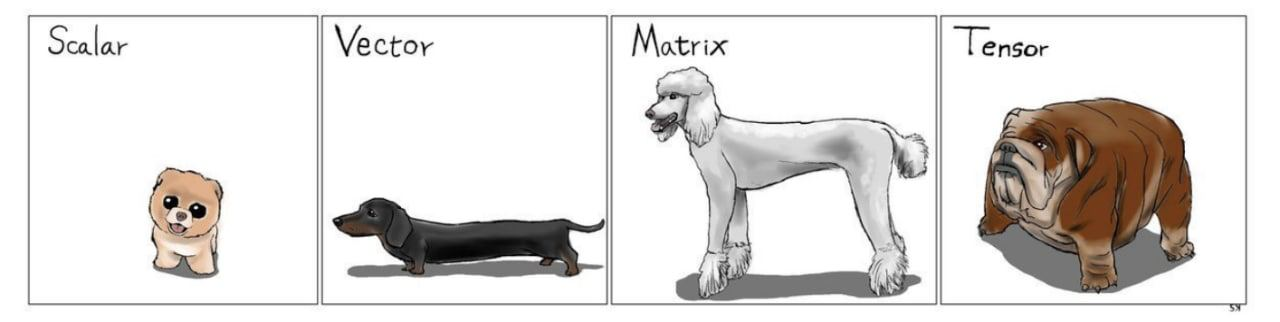

**Тензор с размерностью 1 - это просто вектор, список чисел.**

**Тензор с размерностью 2 - это просто матрица, то есть список списков чисел.**

**Тензор с размерностью 3 и больше - это тензор, то есть список списков списков ... чисел.**

---


*Получить доступ к размеру уже созданного тензора - метод `.shape`:*





In [11]:
some_data = [[[1], [2]], [[3], [4]], [[5], [6]]]
some_tensor = torch.tensor(some_data)

print(some_tensor)
print(some_tensor.shape)

tensor([[[1],
         [2]],

        [[3],
         [4]],

        [[5],
         [6]]])
torch.Size([3, 2, 1])


*Давайте сделаем тензор, который будет нам имитировать изображение - сделаем его размер `(c, h, w)`, где `h` и `w` это его высота и ширина, а `c` - число каналов в цветовом пространстве (в черно-белом 1, в RGB 3):*

In [14]:
h = 9
w = 16
c = 3

shape = (c, h, w)

image_tensor = torch.rand(shape)

image_tensor

tensor([[[0.8750, 0.0545, 0.9753, 0.9717, 0.5077, 0.2997, 0.2143, 0.6763,
          0.8117, 0.2268, 0.5817, 0.8689, 0.8077, 0.5983, 0.5634, 0.9587],
         [0.1329, 0.3454, 0.9790, 0.3852, 0.2805, 0.3361, 0.2642, 0.2188,
          0.6239, 0.6936, 0.0083, 0.0439, 0.9077, 0.5339, 0.4484, 0.7660],
         [0.5151, 0.6924, 0.1540, 0.1655, 0.2208, 0.3342, 0.2351, 0.5671,
          0.2420, 0.0464, 0.2633, 0.5909, 0.2283, 0.9047, 0.5703, 0.2786],
         [0.1464, 0.0462, 0.8555, 0.2070, 0.1617, 0.6540, 0.1749, 0.8171,
          0.7813, 0.4697, 0.9209, 0.0039, 0.6151, 0.1844, 0.2330, 0.2948],
         [0.6342, 0.8510, 0.0262, 0.9851, 0.1835, 0.4832, 0.1264, 0.2620,
          0.1337, 0.9334, 0.4976, 0.2821, 0.9963, 0.9702, 0.8525, 0.4566],
         [0.5010, 0.5610, 0.5916, 0.2544, 0.4188, 0.1836, 0.0774, 0.7835,
          0.5437, 0.1891, 0.6360, 0.7085, 0.9799, 0.9011, 0.7522, 0.1388],
         [0.0148, 0.0383, 0.3455, 0.7973, 0.0672, 0.7626, 0.1352, 0.7344,
          0.4443, 0.2126, 0.3213

In [15]:
image_tensor.shape

torch.Size([3, 9, 16])

*Можем попробовать поменять размер тензора, например, [вытянуть его в вектор](https://pytorch.org/docs/stable/generated/torch.ravel.html):*

In [16]:
image_tensor.ravel()

tensor([0.8750, 0.0545, 0.9753, 0.9717, 0.5077, 0.2997, 0.2143, 0.6763, 0.8117,
        0.2268, 0.5817, 0.8689, 0.8077, 0.5983, 0.5634, 0.9587, 0.1329, 0.3454,
        0.9790, 0.3852, 0.2805, 0.3361, 0.2642, 0.2188, 0.6239, 0.6936, 0.0083,
        0.0439, 0.9077, 0.5339, 0.4484, 0.7660, 0.5151, 0.6924, 0.1540, 0.1655,
        0.2208, 0.3342, 0.2351, 0.5671, 0.2420, 0.0464, 0.2633, 0.5909, 0.2283,
        0.9047, 0.5703, 0.2786, 0.1464, 0.0462, 0.8555, 0.2070, 0.1617, 0.6540,
        0.1749, 0.8171, 0.7813, 0.4697, 0.9209, 0.0039, 0.6151, 0.1844, 0.2330,
        0.2948, 0.6342, 0.8510, 0.0262, 0.9851, 0.1835, 0.4832, 0.1264, 0.2620,
        0.1337, 0.9334, 0.4976, 0.2821, 0.9963, 0.9702, 0.8525, 0.4566, 0.5010,
        0.5610, 0.5916, 0.2544, 0.4188, 0.1836, 0.0774, 0.7835, 0.5437, 0.1891,
        0.6360, 0.7085, 0.9799, 0.9011, 0.7522, 0.1388, 0.0148, 0.0383, 0.3455,
        0.7973, 0.0672, 0.7626, 0.1352, 0.7344, 0.4443, 0.2126, 0.3213, 0.9329,
        0.1109, 0.1584, 0.2281, 0.6688, 

In [17]:
image_tensor.ravel().shape

torch.Size([432])

In [18]:
h * w * c

432

*Посчитаем количество элементов в тензоре с помощью [специальной функции](https://pytorch.org/docs/stable/generated/torch.numel.html)* `.numel`*:*

In [19]:
image_tensor.numel()

432

*Попробуем поменять размер с помощью функции* [`.reshape`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape)*:*

In [ ]:
h = 2
w = 3
c = 3

shape = (c, h, w)

image_tensor = torch.rand(shape)

image_tensor

In [ ]:
image_tensor.reshape(c, h * w)

*Попробуем собрать из нескольких тензоров один большой* [`torch.cat`](https://pytorch.org/docs/stable/generated/torch.cat.html#torch.cat):

In [ ]:
x = torch.randn(2, 3)

In [ ]:
x

In [ ]:
torch.cat((x, x, x), dim=0)

In [ ]:
torch.stack((x, x, x, x), dim=0)

In [ ]:
torch.stack((x, x, x, x), dim=0).shape

In [ ]:
torch.stack((x, x, x, x), dim=2)

In [ ]:
x.unsqueeze_(0)

In [ ]:
x = torch.randn(3, 3)
y = torch.randn(5, 3)
z = torch.randn(1, 3)

for tensor in [x, y, z]:
    print(tensor)

torch.cat((x, y, z), dim=0)

In [ ]:
x = torch.randn(2, 3)
y = torch.randn(2, 5)
z = torch.randn(2, 1)

for tensor in [x, y, z]:
    print(tensor)

torch.stack((x, y, z), dim=1)

*Теперь добавим дополнительную ось, изменим вид массива по олной оси*[`torch.unsqueeze`](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html):

In [ ]:
x = torch.tensor([1, 2, 3, 4])
torch.unsqueeze(x, 0)

In [ ]:
torch.unsqueeze(x, 1)

In [ ]:
x = torch.rand(2, 3)

print(x)
print()
print(x.unsqueeze(0), x.unsqueeze(0).shape)
print()
print(x.unsqueeze(1), x.unsqueeze(1).shape)
print()
print(x.unsqueeze(2), x.unsqueeze(2).shape)

*Уберем лишние оси (где размер единичка):*

In [ ]:
x = torch.rand(1, 2, 1, 3)

print(x)
print()
print(x.squeeze(), x.squeeze().shape)
print()
print(x.squeeze(1), x.squeeze(1).shape)

**Типы данных**

*Теперь поговорим про типы данных в тензорах. По умолчанию в тензорах лежат числа в* **torch.float32 для вещественных и torch.int64 для целочисленных.**

In [ ]:
tensor = torch.tensor([1.5, 2.2, 3.7, 4.9])

tensor

In [ ]:
tensor.dtype

In [ ]:
tensor = torch.tensor([1.5, 2.2, 3.7, 4.9], dtype=torch.float16)

tensor

In [ ]:
tensor = torch.tensor([1.5, 2.2, 3.7, 4.9], dtype=torch.float64)

tensor

In [ ]:
tensor = torch.tensor([15, 22, 37, 49])

tensor

In [ ]:
tensor.dtype

In [ ]:
tensor = torch.tensor([15, 22, 37, 49], dtype=torch.int32)

tensor

In [ ]:
tensor = torch.tensor([15, 22, 37, 49], dtype=torch.int16)

tensor

Размещение тензора на GPU:

In [20]:
print(torch.cuda.is_available())
print(torch.cuda.get_device_name())

True
NVIDIA GeForce RTX 3060 Laptop GPU


In [21]:
! nvidia-smi

Wed Mar  6 18:09:30 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P8             12W /   80W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

print(device)

cuda:0


In [23]:
tensor = torch.tensor([15, 22, 37, 49], device=device)

tensor

tensor([15, 22, 37, 49], device='cuda:0')

In [24]:
tensor = torch.tensor([15, 22, 37, 49])

print(tensor)

tensor = tensor.to(device)

tensor

tensor([15, 22, 37, 49])


tensor([15, 22, 37, 49], device='cuda:0')

In [25]:
tensor.to(torch.int32)

tensor([15, 22, 37, 49], device='cuda:0', dtype=torch.int32)

In [26]:
tensor = tensor.cpu()

tensor

tensor([15, 22, 37, 49])

In [27]:
tensor.cuda()

tensor([15, 22, 37, 49], device='cuda:0')

---
**Операции с тензорами на GPU**

In [28]:
a = torch.rand(2, 3)
b = torch.rand(2, 3)

a + b

tensor([[1.4022, 0.8112, 0.8805],
        [1.6024, 0.5898, 1.2264]])

In [29]:
a = a.to(device)

a + b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [30]:
b = b.to(device)

a + b

tensor([[1.4022, 0.8112, 0.8805],
        [1.6024, 0.5898, 1.2264]], device='cuda:0')

##### **Операции с тензорами**

*See (большая часть операций с тензорами отлично описана в  [документации `PyTorch`](https://pytorch.org/docs/stable/torch.html))*

In [31]:
a = torch.rand(2, 3)
b = torch.rand(2, 3)

a, b

(tensor([[0.2252, 0.1215, 0.3742],
         [0.9216, 0.5442, 0.2049]]),
 tensor([[0.8196, 0.1218, 0.5826],
         [0.3072, 0.0269, 0.2346]]))

In [32]:
# поэлементные

print(a + b)

print()

print(torch.add(a, b))

print()

print(a.add(b))

tensor([[1.0448, 0.2434, 0.9567],
        [1.2287, 0.5711, 0.4395]])

tensor([[1.0448, 0.2434, 0.9567],
        [1.2287, 0.5711, 0.4395]])

tensor([[1.0448, 0.2434, 0.9567],
        [1.2287, 0.5711, 0.4395]])


In [33]:
print(a - b)

print()

print(torch.sub(a, b))

print()

print(a.sub(b))

tensor([[-5.9446e-01, -2.9427e-04, -2.0841e-01],
        [ 6.1443e-01,  5.1728e-01, -2.9639e-02]])

tensor([[-5.9446e-01, -2.9427e-04, -2.0841e-01],
        [ 6.1443e-01,  5.1728e-01, -2.9639e-02]])

tensor([[-5.9446e-01, -2.9427e-04, -2.0841e-01],
        [ 6.1443e-01,  5.1728e-01, -2.9639e-02]])


In [34]:
print(a * b)

print()

print(torch.mul(a, b))

print()

print(a.mul(b))

tensor([[0.1846, 0.0148, 0.2180],
        [0.2831, 0.0146, 0.0481]])

tensor([[0.1846, 0.0148, 0.2180],
        [0.2831, 0.0146, 0.0481]])

tensor([[0.1846, 0.0148, 0.2180],
        [0.2831, 0.0146, 0.0481]])


In [35]:
print(a / b)

print()

print(torch.div(a, b))

print()

print(a.div(b))

tensor([[ 0.2747,  0.9976,  0.6423],
        [ 3.0004, 20.2192,  0.8737]])

tensor([[ 0.2747,  0.9976,  0.6423],
        [ 3.0004, 20.2192,  0.8737]])

tensor([[ 0.2747,  0.9976,  0.6423],
        [ 3.0004, 20.2192,  0.8737]])


In [36]:
a = torch.rand(2, 3)
b = torch.rand(3, 4)
c = torch.rand(5, 5)

a, b, c

(tensor([[0.5887, 0.2057, 0.8175],
         [0.1763, 0.4427, 0.2378]]),
 tensor([[0.9538, 0.0498, 0.5886, 0.7735],
         [0.6256, 0.6694, 0.1686, 0.8771],
         [0.7015, 0.9737, 0.2603, 0.0685]]),
 tensor([[0.6572, 0.2380, 0.8011, 0.7572, 0.1147],
         [0.7527, 0.6595, 0.3677, 0.7977, 0.6658],
         [0.9254, 0.4589, 0.9223, 0.3290, 0.3802],
         [0.5551, 0.7692, 0.8184, 0.0517, 0.6869],
         [0.3677, 0.6544, 0.4919, 0.9580, 0.7048]]))

In [37]:
# матричные операции

print(a @ b, (a @ b).shape)

print()

print(torch.matmul(a, b), torch.matmul(a, b).shape)

print()

print(c.trace())

print()

print(c.exp())

tensor([[1.2637, 0.9631, 0.5940, 0.6918],
        [0.6119, 0.5366, 0.2403, 0.5409]]) torch.Size([2, 4])

tensor([[1.2637, 0.9631, 0.5940, 0.6918],
        [0.6119, 0.5366, 0.2403, 0.5409]]) torch.Size([2, 4])

tensor(2.9954)

tensor([[1.9293, 1.2687, 2.2280, 2.1324, 1.1215],
        [2.1228, 1.9339, 1.4444, 2.2204, 1.9460],
        [2.5228, 1.5824, 2.5151, 1.3896, 1.4626],
        [1.7422, 2.1580, 2.2669, 1.0530, 1.9875],
        [1.4444, 1.9239, 1.6354, 2.6066, 2.0234]])


### **[Autograd](https://pytorch.org/docs/stable/notes/autograd.html)**

*(автоматическое дифференцирование)*

*See* https://pytorch.org/tutorials/beginner/basics/autogradqs_tutorial.html

In [38]:
# manual gradient for mse loss in linear regression
def grad(w, X, y):
    return (2 * X.T @ (X @ w - y)) / len(X)

X = np.random.rand(5, 2)
y = np.random.rand(5)
w = np.array([1., 2.])

grad(w, X, y)

array([0.6801066 , 0.84833734])

In [39]:
# torch gradient
X = torch.from_numpy(X).to(dtype=torch.float)
y = torch.from_numpy(y).to(dtype=torch.float)
w = torch.tensor([1., 2.], requires_grad=True)

l = torch.nn.functional.mse_loss(X @ w, y)
l.backward()

w.grad

tensor([0.6801, 0.8483])

*Разберем автоматическое дифференцирование подробнее:*

In [40]:
x = torch.rand(5)

x

tensor([0.1661, 0.6707, 0.4976, 0.1223, 0.5337])

In [41]:
w = torch.rand(3, 5, requires_grad=True)

w

tensor([[0.3870, 0.3715, 0.4121, 0.6239, 0.4469],
        [0.7128, 0.7745, 0.0647, 0.0510, 0.6031],
        [0.1537, 0.2948, 0.0022, 0.4852, 0.8756]], requires_grad=True)

In [42]:
print(w.grad)

None


In [43]:
first_z = torch.empty(3)

first_z

tensor([2.3694e-38, 2.3694e-38, 2.3694e-38])

In [44]:
for i in range(3):
    first_z[i] = torch.sum(w[i] * x)

first_z

tensor([0.8333, 0.9981, 0.7510], grad_fn=<CopySlices>)

In [ ]:
z = torch.matmul(x, w.t())

z

tensor([1.6667, 1.6921, 0.7927], grad_fn=<SqueezeBackward4>)

In [ ]:
v = torch.rand(3, requires_grad=True)

v

tensor([0.7915, 0.1095, 0.9630], requires_grad=True)

In [ ]:
print(v.grad)

None


In [ ]:
y = torch.sum(z * v)

y

tensor(2.2678, grad_fn=<SumBackward0>)

In [ ]:
y.item()

2.2677953243255615

In [ ]:
loss = torch.mean((y - 2) ** 2)

In [ ]:
loss

tensor(0.0717, grad_fn=<MeanBackward0>)

In [ ]:
print(f'{x.grad=}\n')
print(f'{w.grad=}\n')
print(f'{z.grad=}\n')
print(f'{v.grad=}\n')

x.grad=None

w.grad=None

z.grad=None

v.grad=None



<ipython-input-67-b1828bd1c118>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(f'{z.grad=}\n')


In [ ]:
loss.backward()

In [ ]:
print(f'{x.grad=}\n')
print(f'{w.grad=}\n')
print(f'{z.grad=}\n')
print(f'{v.grad=}\n')

x.grad=None

w.grad=tensor([[0.3732, 0.3056, 0.0767, 0.1807, 0.3969],
        [0.0516, 0.0423, 0.0106, 0.0250, 0.0549],
        [0.4540, 0.3719, 0.0933, 0.2198, 0.4828]])

z.grad=None

v.grad=tensor([0.8926, 0.9063, 0.4246])



<ipython-input-69-b1828bd1c118>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(f'{z.grad=}\n')


In [ ]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

a, b

(tensor([0.0741], requires_grad=True), tensor([0.4929], requires_grad=True))

In [ ]:
loss = (a - b)

loss

tensor([-0.4188], grad_fn=<SubBackward0>)

In [ ]:
print(f'{a.grad=}\n')
print(f'{b.grad=}\n')

a.grad=None

b.grad=None



In [ ]:
loss.backward()

In [ ]:
print(f'{a.grad=}\n')  # 1
print(f'{b.grad=}\n')  # -1

a.grad=tensor([1.])

b.grad=tensor([-1.])



In [ ]:
a.grad.zero_()
b.grad.zero_()

tensor([0.])

In [ ]:
loss = (a - b) ** 2

loss

tensor([0.1754], grad_fn=<PowBackward0>)

In [ ]:
print(f'{a.grad=}\n')
print(f'{b.grad=}\n')

a.grad=tensor([0.])

b.grad=tensor([0.])



In [ ]:
loss.backward()

In [ ]:
print(f'{a.grad=}\n')  # 2 * (a - b)
print(f'{b.grad=}\n')  # -2 * (a - b)

a.grad=tensor([-0.8377])

b.grad=tensor([0.8377])



In [ ]:
2 * (a - b)

tensor([-0.8377], grad_fn=<MulBackward0>)

In [ ]:
a = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5, requires_grad=True)

a, b

(tensor([[0.6319, 0.8505, 0.8148, 0.8312, 0.4591],
         [0.1379, 0.2636, 0.0371, 0.2305, 0.3626],
         [0.2629, 0.1671, 0.9400, 0.5612, 0.8264]], requires_grad=True),
 tensor([[0.0956, 0.3902, 0.6331, 0.8276, 0.6653],
         [0.0791, 0.6335, 0.7203, 0.8449, 0.7841],
         [0.4059, 0.2408, 0.9323, 0.7469, 0.5525]], requires_grad=True))

In [ ]:
loss = torch.mean(a * b)

loss

tensor(0.2989, grad_fn=<MeanBackward0>)

In [ ]:
print(f'{a.grad=}\n')
print(f'{b.grad=}\n')

a.grad=None

b.grad=None



In [ ]:
loss.backward()

In [ ]:
print(f'{a.grad=}\n')  # b / (3 * 5)
print(f'{b.grad=}\n')  # a / (3 * 5)

a.grad=tensor([[0.0064, 0.0260, 0.0422, 0.0552, 0.0444],
        [0.0053, 0.0422, 0.0480, 0.0563, 0.0523],
        [0.0271, 0.0161, 0.0622, 0.0498, 0.0368]])

b.grad=tensor([[0.0421, 0.0567, 0.0543, 0.0554, 0.0306],
        [0.0092, 0.0176, 0.0025, 0.0154, 0.0242],
        [0.0175, 0.0111, 0.0627, 0.0374, 0.0551]])



In [ ]:
a / 15

tensor([[0.0421, 0.0567, 0.0543, 0.0554, 0.0306],
        [0.0092, 0.0176, 0.0025, 0.0154, 0.0242],
        [0.0175, 0.0111, 0.0627, 0.0374, 0.0551]], grad_fn=<DivBackward0>)

In [ ]:
b / 15

tensor([[0.0064, 0.0260, 0.0422, 0.0552, 0.0444],
        [0.0053, 0.0422, 0.0480, 0.0563, 0.0523],
        [0.0271, 0.0161, 0.0622, 0.0498, 0.0368]], grad_fn=<DivBackward0>)

In [ ]:
a = torch.rand(3, 5, requires_grad=True)

print(f'{a=}\n')

loss1 = torch.sum(a ** 2) # 2a
loss2 = torch.sum(a) # 1

print(f'{a.grad=}\n')

loss1.backward()

print(f'{a.grad=}\n')

loss2.backward()

print(f'{a.grad=}\n')

a=tensor([[0.7870, 0.6523, 0.8041, 0.3739, 0.1181],
        [0.0136, 0.2125, 0.4341, 0.5196, 0.9909],
        [0.5955, 0.5289, 0.3491, 0.3949, 0.3960]], requires_grad=True)

a.grad=None

a.grad=tensor([[1.5740, 1.3046, 1.6082, 0.7477, 0.2363],
        [0.0272, 0.4250, 0.8682, 1.0391, 1.9817],
        [1.1909, 1.0577, 0.6982, 0.7899, 0.7921]])

a.grad=tensor([[2.5740, 2.3046, 2.6082, 1.7477, 1.2363],
        [1.0272, 1.4250, 1.8682, 2.0391, 2.9817],
        [2.1909, 2.0577, 1.6982, 1.7899, 1.7921]])



In [ ]:
print(f'{2*a=}\n')
print(f'{2*a+1=}')

2*a=tensor([[1.5740, 1.3046, 1.6082, 0.7477, 0.2363],
        [0.0272, 0.4250, 0.8682, 1.0391, 1.9817],
        [1.1909, 1.0577, 0.6982, 0.7899, 0.7921]], grad_fn=<MulBackward0>)

2*a+1=tensor([[2.5740, 2.3046, 2.6082, 1.7477, 1.2363],
        [1.0272, 1.4250, 1.8682, 2.0391, 2.9817],
        [2.1909, 2.0577, 1.6982, 1.7899, 1.7921]], grad_fn=<AddBackward0>)


In [ ]:
a = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5, requires_grad=False)

a, b

(tensor([[0.0836, 0.0057, 0.2223, 0.5970, 0.0317],
         [0.5148, 0.8123, 0.3981, 0.4292, 0.2508],
         [0.9413, 0.1980, 0.0616, 0.6142, 0.0225]], requires_grad=True),
 tensor([[0.2504, 0.2791, 0.3956, 0.1135, 0.8950],
         [0.0970, 0.4064, 0.9872, 0.8547, 0.9631],
         [0.3683, 0.3072, 0.2074, 0.4307, 0.9419]]))

In [ ]:
loss = torch.sum(a - b)

loss

tensor(-2.3142, grad_fn=<SumBackward0>)

In [ ]:
print(f'{a.grad=}\n')
print(f'{b.grad=}\n')

a.grad=None

b.grad=None



In [ ]:
loss.backward()

In [ ]:
print(f'{a.grad=}\n')  # all ones
print(f'{b.grad=}\n')  # None

a.grad=tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

b.grad=None



In [ ]:
a = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5, requires_grad=True)

a, b

(tensor([[0.9684, 0.2653, 0.1151, 0.1948, 0.6862],
         [0.5030, 0.4131, 0.3096, 0.7519, 0.5004],
         [0.4206, 0.3655, 0.4974, 0.6784, 0.5406]], requires_grad=True),
 tensor([[0.6868, 0.6012, 0.2968, 0.7587, 0.5370],
         [0.8203, 0.8835, 0.1949, 0.8293, 0.8205],
         [0.9489, 0.2799, 0.3617, 0.9740, 0.1025]], requires_grad=True))

In [ ]:
with torch.no_grad():
    loss = torch.sum(a - b)

loss

tensor(-1.8854)

In [ ]:
#loss.backward()

In [ ]:
a = torch.rand(3, 5, requires_grad=True)
b = torch.rand(3, 5, requires_grad=True)

a, b

(tensor([[0.4399, 0.8487, 0.0138, 0.1205, 0.0332],
         [0.9171, 0.8528, 0.0367, 0.8605, 0.7090],
         [0.2459, 0.2460, 0.7151, 0.7038, 0.9963]], requires_grad=True),
 tensor([[0.3935, 0.2030, 0.1114, 0.3232, 0.3262],
         [0.6740, 0.1557, 0.1059, 0.4893, 0.2441],
         [0.8694, 0.0173, 0.3391, 0.8552, 0.0381]], requires_grad=True))

In [ ]:
with torch.inference_mode():
    loss = torch.sum(a - b)

loss

tensor(2.5941)

In [ ]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
with torch.no_grad():
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)

    loss = torch.sum(a + b)

    print(f'{loss=}')

    loss.backward()

loss=tensor(16.9683)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
loss2 = torch.sum(a + b)

loss2

In [ ]:
print(f'{a.grad=}\n')
print(f'{b.grad=}\n')

a.grad=None

b.grad=None



In [ ]:
loss2.backward()

In [ ]:
print(f'{a.grad=}\n')
print(f'{b.grad=}\n')

a.grad=tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

b.grad=tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])



In [ ]:
with torch.inference_mode():
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)

    loss = torch.sum(a + b)

    print(f'{loss=}')

    loss.backward()

loss=tensor(14.0715)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
loss2 = torch.sum(a + b)

loss2

tensor(14.0715)

In [ ]:
@torch.no_grad()
def foo():
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)

    loss = torch.mean(a + b)

    print(f'{loss=}')

    return a, b

In [ ]:
a, b = foo()

loss=tensor(0.9965)


In [ ]:
torch.mean(a - b)

tensor(0.1137, grad_fn=<MeanBackward0>)

In [ ]:
@torch.inference_mode()
def foo():
    a = torch.rand(3, 5, requires_grad=True)
    b = torch.rand(3, 5, requires_grad=True)

    loss = torch.mean(a + b)

    print(f'{loss=}')

    return a, b

In [ ]:
a, b = foo()

loss=tensor(1.1460)


In [ ]:
torch.mean(a - b)

tensor(0.1046)

In [ ]:
a.requires_grad = False

### **[torch.nn](https://pytorch.org/docs/stable/nn.html)**



*(computational graph)*

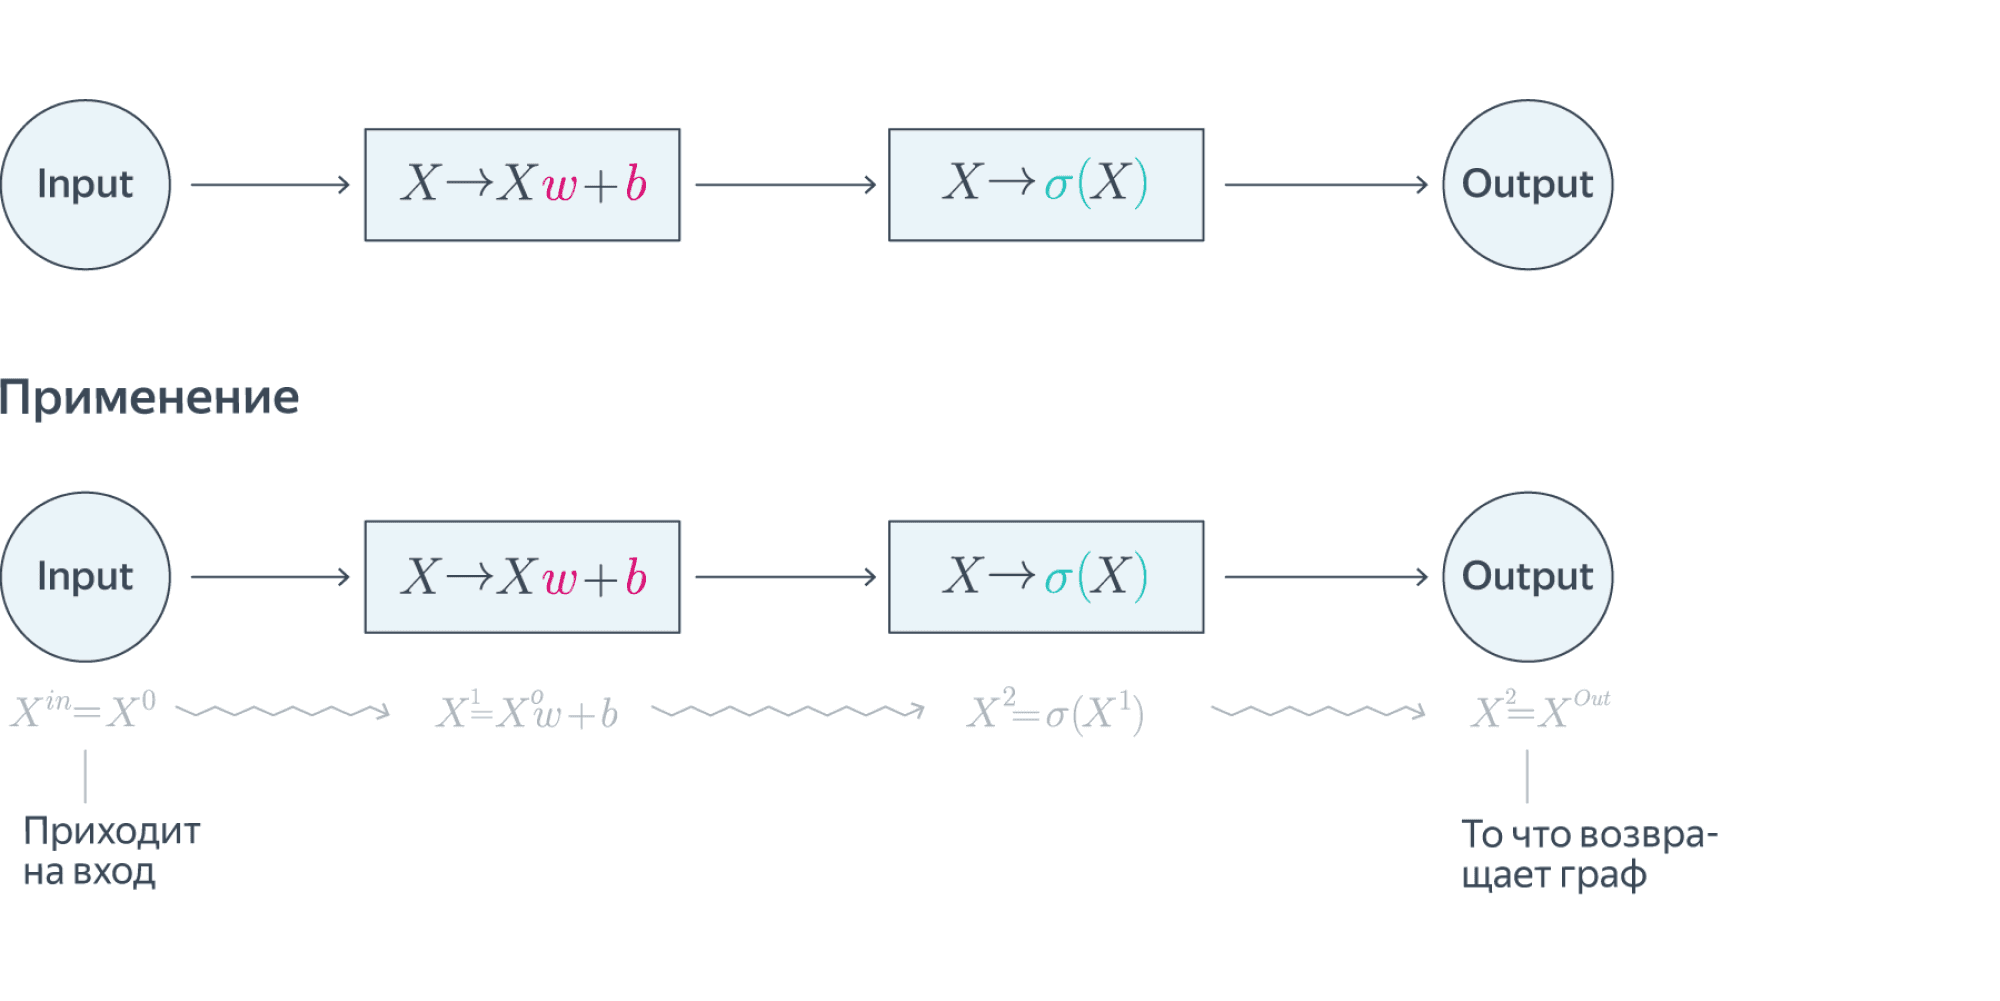

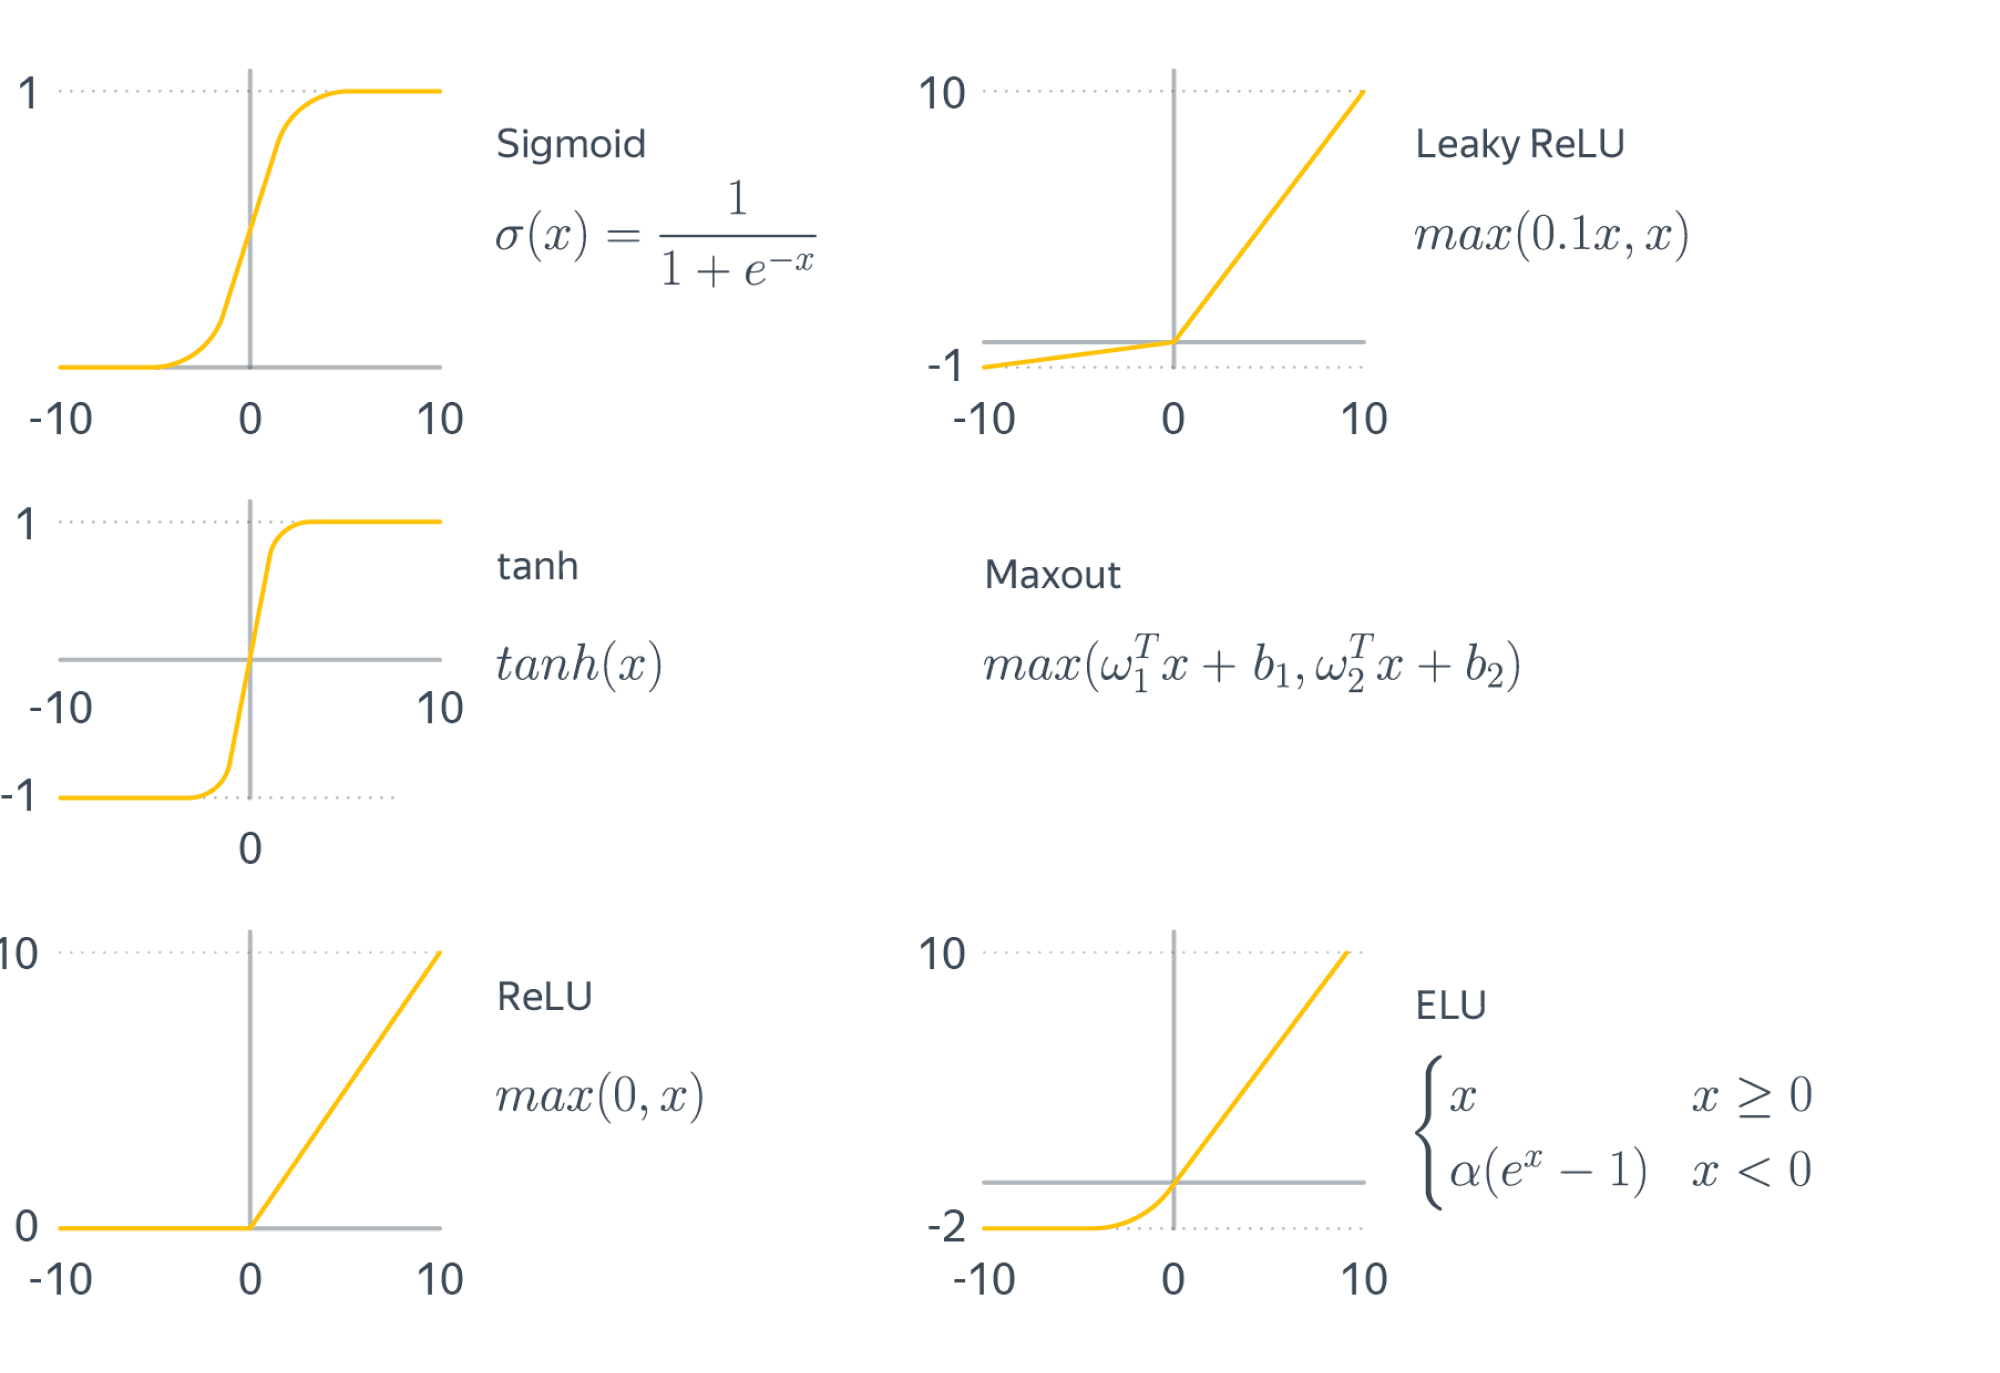

In [ ]:
from torch import nn

##### **[Полносвязный слой](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)**

>$y_j = \sum\limits_{i=1}^{n}x_iw_{ji} + b_j$


In [ ]:
layer = nn.Linear(in_features=5, out_features=2,  bias=True)

In [ ]:
layer

Linear(in_features=5, out_features=2, bias=True)

In [ ]:
layer.weight

Parameter containing:
tensor([[-0.4060,  0.1572, -0.1412, -0.3672, -0.2152],
        [-0.2531,  0.3992,  0.1514, -0.0142,  0.0179]], requires_grad=True)

In [ ]:
layer.weight.shape

torch.Size([2, 5])

In [ ]:
layer.bias

Parameter containing:
tensor([-0.2657, -0.1457], requires_grad=True)

In [ ]:
layer = nn.Linear(in_features=5, out_features=3, bias=False)

In [ ]:
layer.bias

In [ ]:
# layer.__call__

<bound method Module._wrapped_call_impl of Linear(in_features=5, out_features=3, bias=False)>

In [ ]:
x = torch.randn(5)

print(layer(x))

tensor([-0.4364, -0.0059, -1.7829], grad_fn=<SqueezeBackward4>)


In [ ]:
layer1 = nn.Linear(in_features=5, out_features=3)
layer2 = nn.Linear(in_features=3, out_features=1)

layer2(layer1(x))

tensor([-0.0350], grad_fn=<ViewBackward0>)

##### **Функции активации**

>  $ Sigmoid \ f(x) = \dfrac{1}{1 + e^{-x}}$

*See* https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid

In [ ]:
activation = nn.Sigmoid()

In [ ]:
x = torch.randn(5)

print(x)

print(activation(x))

tensor([-0.1827,  0.5907, -2.1403,  1.2116, -0.4875])
tensor([0.4544, 0.6435, 0.1052, 0.7706, 0.3805])


> $ReLU \ f(x) = \max(0, x)$

*See* https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU

In [ ]:
activation = nn.ReLU()

In [ ]:
x = torch.randn(5)

print(x)

print(activation(x))

tensor([ 0.6392, -0.5116,  0.8536, -0.7200, -0.9320])
tensor([0.6392, 0.0000, 0.8536, 0.0000, 0.0000])


> $ Leaky \ ReLU \ f(x) = \max(0, x) + \alpha \min(0, x)$

*See* https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html#torch.nn.LeakyReLU

In [ ]:
activation = nn.LeakyReLU(negative_slope=0.001)

In [ ]:
x = torch.randn(5)

print(x)

print(activation(x))

tensor([0.8258, 0.3053, 0.5178, 1.1380, 0.5233])
tensor([0.8258, 0.3053, 0.5178, 1.1380, 0.5233])


In [ ]:
layer1 = nn.Linear(in_features=5, out_features=3)
activation = nn.LeakyReLU(negative_slope=0.001)
layer2 = nn.Linear(in_features=3, out_features=1)

layer2(activation(layer1(x)))

tensor([0.2519], grad_fn=<ViewBackward0>)

#####**Запускаем градиентный спуск в нейронной сети своими руками**

In [ ]:
n_features = 2
n_objects = 300

torch.manual_seed(0)

w_true = torch.randn(n_features)
b_true = torch.randn(1)

x = (torch.rand(n_objects, n_features) - 0.5) * 10 * (torch.arange(n_features) * 2 + 1)
y = torch.matmul(x, w_true) + torch.randn(n_objects) + b_true

In [ ]:
x

tensor([[-4.4372e-01,  3.9692e+00],
        [-1.5111e+00, -2.9485e+00],
        [-4.7767e+00, -9.9342e+00],
        [-2.0611e+00,  5.5565e-01],
        [ 1.9767e+00,  9.0003e+00],
        [-3.3897e+00, -6.5319e+00],
        [ 1.8161e+00,  1.2456e+01],
        [-1.0290e+00,  1.1225e+01],
        [-8.0592e-01,  1.5872e+00],
        [ 4.5274e+00, -1.3915e+01],
        [-3.1477e+00, -3.7975e+00],
        [-1.9490e+00,  1.2960e+01],
        [-3.2409e+00, -6.9050e+00],
        [-3.4932e+00, -1.4048e+01],
        [-2.9187e+00,  1.2894e+01],
        [ 2.2311e+00,  7.2701e+00],
        [ 2.6296e-01, -7.6903e+00],
        [ 8.4592e-01, -1.4005e+01],
        [-3.6128e+00, -7.7330e+00],
        [ 3.1547e+00,  8.7948e+00],
        [-2.2175e+00, -5.4124e-01],
        [ 3.1978e+00,  1.4912e+01],
        [ 1.9844e+00,  2.0264e+00],
        [ 3.3524e+00, -8.8320e+00],
        [ 9.3172e-01, -1.1630e+01],
        [-3.4654e+00, -7.7488e+00],
        [ 2.2624e+00,  6.0324e+00],
        [-2.9618e+00,  4.531

In [ ]:
x.shape

torch.Size([300, 2])

In [ ]:
y.shape

torch.Size([300])

In [ ]:
n_steps = 200
step_size = 1e-2

In [ ]:
w = torch.rand(n_features, requires_grad=True)
b = torch.rand(1, requires_grad=True)

for i in range(n_steps):
    y_pred = torch.matmul(x, w) + b

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'Loss: MSE; epoch {i + 1}: {mse.item():.5f}')

    mse.backward()

#     print(f'{w.grad=}\n')
#     print(f'{b.grad=}\n')

    with torch.no_grad():
        w -= w.grad * step_size
        b -= b.grad * step_size

    w.grad.zero_()
    b.grad.zero_()

Loss: MSE; epoch 1: 23.65750
Loss: MSE; epoch 2: 15.53605
Loss: MSE; epoch 3: 12.11575
Loss: MSE; epoch 4: 10.36995
Loss: MSE; epoch 5: 9.30175
Loss: MSE; epoch 6: 8.55659
Loss: MSE; epoch 7: 7.99169
Loss: MSE; epoch 8: 7.53972
Loss: MSE; epoch 9: 7.16377
Loss: MSE; epoch 10: 6.84131
Loss: MSE; epoch 11: 6.55765
Loss: MSE; epoch 12: 6.30292
Loss: MSE; epoch 13: 6.07033
Loss: MSE; epoch 14: 5.85515
Loss: MSE; epoch 15: 5.65409
Loss: MSE; epoch 16: 5.46479
Loss: MSE; epoch 17: 5.28555
Loss: MSE; epoch 18: 5.11514
Loss: MSE; epoch 19: 4.95265
Loss: MSE; epoch 20: 4.79735
Loss: MSE; epoch 21: 4.64871
Loss: MSE; epoch 31: 3.45555
Loss: MSE; epoch 41: 2.65631
Loss: MSE; epoch 51: 2.11964
Loss: MSE; epoch 61: 1.75925
Loss: MSE; epoch 71: 1.51724
Loss: MSE; epoch 81: 1.35471
Loss: MSE; epoch 91: 1.24558
Loss: MSE; epoch 101: 1.17229
Loss: MSE; epoch 111: 1.12307
Loss: MSE; epoch 121: 1.09002
Loss: MSE; epoch 131: 1.06782
Loss: MSE; epoch 141: 1.05292
Loss: MSE; epoch 151: 1.04291
Loss: MSE; ep

In [ ]:
layer = nn.Linear(in_features=n_features, out_features=1)


for i in range(n_steps):
    y_pred = layer(x)

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'Loss: MSE; epoch {i + 1}: {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

#     layer.weight.grad.zero_()
#     layer.bias.grad.zero_()

    layer.zero_grad()

Loss: MSE; epoch 1: 61.04560
Loss: MSE; epoch 2: 43.79891
Loss: MSE; epoch 3: 37.83810
Loss: MSE; epoch 4: 35.47980
Loss: MSE; epoch 5: 34.33194
Loss: MSE; epoch 6: 33.63191
Loss: MSE; epoch 7: 33.12450
Loss: MSE; epoch 8: 32.71631
Loss: MSE; epoch 9: 32.36813
Loss: MSE; epoch 10: 32.06060
Loss: MSE; epoch 11: 31.78264
Loss: MSE; epoch 12: 31.52728
Loss: MSE; epoch 13: 31.28983
Loss: MSE; epoch 14: 31.06706
Loss: MSE; epoch 15: 30.85670
Loss: MSE; epoch 16: 30.65709
Loss: MSE; epoch 17: 30.46700
Loss: MSE; epoch 18: 30.28552
Loss: MSE; epoch 19: 30.11194
Loss: MSE; epoch 20: 29.94569
Loss: MSE; epoch 21: 29.78632
Loss: MSE; epoch 31: 28.50329
Loss: MSE; epoch 41: 27.64299
Loss: MSE; epoch 51: 27.06530
Loss: MSE; epoch 61: 26.67736
Loss: MSE; epoch 71: 26.41685
Loss: MSE; epoch 81: 26.24191
Loss: MSE; epoch 91: 26.12443
Loss: MSE; epoch 101: 26.04553
Loss: MSE; epoch 111: 25.99255
Loss: MSE; epoch 121: 25.95698
Loss: MSE; epoch 131: 25.93308
Loss: MSE; epoch 141: 25.91704
Loss: MSE; epo

In [ ]:
layer(x)

tensor([[-2.7148],
        [-2.7140],
        [-2.7176],
        [-2.7166],
        [-2.7120],
        [-2.7163],
        [-2.7139],
        [-2.7192],
        [-2.7145],
        [-2.6967],
        [-2.7170],
        [-2.7219],
        [-2.7158],
        [-2.7131],
        [-2.7239],
        [-2.7108],
        [-2.7082],
        [-2.7042],
        [-2.7162],
        [-2.7095],
        [-2.7165],
        [-2.7121],
        [-2.7090],
        [-2.7013],
        [-2.7051],
        [-2.7159],
        [-2.7101],
        [-2.7203],
        [-2.7056],
        [-2.7133],
        [-2.7121],
        [-2.7177],
        [-2.7136],
        [-2.7090],
        [-2.7043],
        [-2.7071],
        [-2.7277],
        [-2.6977],
        [-2.7091],
        [-2.7108],
        [-2.7043],
        [-2.7117],
        [-2.7072],
        [-2.7181],
        [-2.7084],
        [-2.7164],
        [-2.7069],
        [-2.7150],
        [-2.7219],
        [-2.7148],
        [-2.7137],
        [-2.7203],
        [-2.

In [ ]:
layer(x).shape

torch.Size([300, 1])

In [ ]:
y.shape

torch.Size([300])

In [ ]:
(layer(x) - y).shape

torch.Size([300, 300])

In [ ]:
layer(x).ravel()

tensor([-2.7148, -2.7140, -2.7176, -2.7166, -2.7120, -2.7163, -2.7139, -2.7192,
        -2.7145, -2.6967, -2.7170, -2.7219, -2.7158, -2.7131, -2.7239, -2.7108,
        -2.7082, -2.7042, -2.7162, -2.7095, -2.7165, -2.7121, -2.7090, -2.7013,
        -2.7051, -2.7159, -2.7101, -2.7203, -2.7056, -2.7133, -2.7121, -2.7177,
        -2.7136, -2.7090, -2.7043, -2.7071, -2.7277, -2.6977, -2.7091, -2.7108,
        -2.7043, -2.7117, -2.7072, -2.7181, -2.7084, -2.7164, -2.7069, -2.7150,
        -2.7219, -2.7148, -2.7137, -2.7203, -2.7244, -2.6995, -2.7150, -2.7122,
        -2.7085, -2.7203, -2.7181, -2.7115, -2.7103, -2.7158, -2.7185, -2.7041,
        -2.7113, -2.7143, -2.7066, -2.7019, -2.7183, -2.7051, -2.7122, -2.7162,
        -2.7179, -2.7002, -2.7005, -2.7116, -2.7128, -2.7157, -2.7138, -2.7193,
        -2.7210, -2.7004, -2.7052, -2.7256, -2.7104, -2.6985, -2.7097, -2.7066,
        -2.7095, -2.7132, -2.7242, -2.7085, -2.7197, -2.7158, -2.7204, -2.7181,
        -2.7160, -2.7154, -2.7228, -2.72

In [ ]:
(layer(x).ravel() - y).shape

torch.Size([300])

In [ ]:
layer = nn.Linear(in_features=n_features, out_features=1)

for i in range(n_steps):
    y_pred = layer(x).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 10 == 0:
        print(f'Loss: MSE; epoch {i + 1}: {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

    layer.zero_grad()

Loss: MSE; epoch 1: 24.25042
Loss: MSE; epoch 2: 12.14032
Loss: MSE; epoch 3: 7.56999
Loss: MSE; epoch 4: 5.56054
Loss: MSE; epoch 5: 4.51141
Loss: MSE; epoch 6: 3.87844
Loss: MSE; epoch 7: 3.45734
Loss: MSE; epoch 8: 3.15958
Loss: MSE; epoch 9: 2.94016
Loss: MSE; epoch 10: 2.77302
Loss: MSE; epoch 11: 2.64175
Loss: MSE; epoch 12: 2.53550
Loss: MSE; epoch 13: 2.44699
Loss: MSE; epoch 14: 2.37122
Loss: MSE; epoch 15: 2.30476
Loss: MSE; epoch 16: 2.24524
Loss: MSE; epoch 17: 2.19103
Loss: MSE; epoch 18: 2.14098
Loss: MSE; epoch 19: 2.09428
Loss: MSE; epoch 20: 2.05035
Loss: MSE; epoch 21: 2.00880
Loss: MSE; epoch 31: 1.68252
Loss: MSE; epoch 41: 1.46566
Loss: MSE; epoch 51: 1.32008
Loss: MSE; epoch 61: 1.22232
Loss: MSE; epoch 71: 1.15667
Loss: MSE; epoch 81: 1.11258
Loss: MSE; epoch 91: 1.08297
Loss: MSE; epoch 101: 1.06309
Loss: MSE; epoch 111: 1.04974
Loss: MSE; epoch 121: 1.04078
Loss: MSE; epoch 131: 1.03476
Loss: MSE; epoch 141: 1.03071
Loss: MSE; epoch 151: 1.02800
Loss: MSE; epoc

In [ ]:
n_features = 5
n_objects = 300

torch.manual_seed(0)

w_true = torch.randn(n_features)

x = (torch.rand(n_objects, n_features) - 0.5) * 10 * (torch.arange(n_features) * 2 + 1)
y = torch.matmul(x, w_true) + torch.randn(n_objects)

In [ ]:
x.shape, y.shape

(torch.Size([300, 5]), torch.Size([300]))

In [ ]:
n_steps = 500
step_size = 1e-3

In [ ]:
layer = nn.Linear(in_features=n_features, out_features=1)

for i in range(n_steps):
    y_pred = layer(x).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 50 == 0:
        print(f'Loss: MSE; epoch {i + 1}: {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer.weight -= layer.weight.grad * step_size
        layer.bias -= layer.bias.grad * step_size

    layer.zero_grad()

Loss: MSE; epoch 1: 1522.64282
Loss: MSE; epoch 2: 345.22870
Loss: MSE; epoch 3: 134.71320
Loss: MSE; epoch 4: 69.14159
Loss: MSE; epoch 5: 45.61798
Loss: MSE; epoch 6: 36.15922
Loss: MSE; epoch 7: 31.74179
Loss: MSE; epoch 8: 29.24492
Loss: MSE; epoch 9: 27.53952
Loss: MSE; epoch 10: 26.19924
Loss: MSE; epoch 11: 25.05364
Loss: MSE; epoch 12: 24.02866
Loss: MSE; epoch 13: 23.08827
Loss: MSE; epoch 14: 22.21260
Loss: MSE; epoch 15: 21.38941
Loss: MSE; epoch 16: 20.61047
Loss: MSE; epoch 17: 19.86992
Loss: MSE; epoch 18: 19.16344
Loss: MSE; epoch 19: 18.48770
Loss: MSE; epoch 20: 17.84015
Loss: MSE; epoch 51: 6.27402
Loss: MSE; epoch 101: 1.74083
Loss: MSE; epoch 151: 1.02593
Loss: MSE; epoch 201: 0.91269
Loss: MSE; epoch 251: 0.89435
Loss: MSE; epoch 301: 0.89104
Loss: MSE; epoch 351: 0.89019
Loss: MSE; epoch 401: 0.88977
Loss: MSE; epoch 451: 0.88948


In [ ]:
n_steps = 1000
step_size = 3e-4

In [ ]:
layer1 = nn.Linear(in_features=n_features, out_features=3)
layer2 = nn.Linear(in_features=3, out_features=1)
activation = nn.ReLU()


for i in range(n_steps):
    y_pred = layer2(activation(layer1(x))).ravel()

    mse = torch.mean((y_pred - y) ** 2)

    if i < 20 or i % 50 == 0:
        print(f'Loss: MSE; epoch {i + 1}: {mse.item():.5f}')

    mse.backward()

    with torch.no_grad():
        layer1.weight -= layer1.weight.grad * step_size
        layer1.bias -= layer1.bias.grad * step_size
        layer2.weight -= layer2.weight.grad * step_size
        layer2.bias -= layer2.bias.grad * step_size

    layer1.zero_grad()
    layer2.zero_grad()

Loss: MSE; epoch 1: 2065.53369
Loss: MSE; epoch 2: 1941.40039
Loss: MSE; epoch 3: 1890.73816
Loss: MSE; epoch 4: 1863.17334
Loss: MSE; epoch 5: 1843.74536
Loss: MSE; epoch 6: 1825.21838
Loss: MSE; epoch 7: 1803.15234
Loss: MSE; epoch 8: 1775.96960
Loss: MSE; epoch 9: 1741.44421
Loss: MSE; epoch 10: 1696.50024
Loss: MSE; epoch 11: 1638.66479
Loss: MSE; epoch 12: 1570.60828
Loss: MSE; epoch 13: 1498.17651
Loss: MSE; epoch 14: 1426.69543
Loss: MSE; epoch 15: 1361.06189
Loss: MSE; epoch 16: 1304.04346
Loss: MSE; epoch 17: 1252.44177
Loss: MSE; epoch 18: 1201.12524
Loss: MSE; epoch 19: 1142.44934
Loss: MSE; epoch 20: 1069.69470
Loss: MSE; epoch 51: 10.77816
Loss: MSE; epoch 101: 5.31390
Loss: MSE; epoch 151: 3.22006
Loss: MSE; epoch 201: 2.08225
Loss: MSE; epoch 251: 1.45981
Loss: MSE; epoch 301: 1.16964
Loss: MSE; epoch 351: 1.03444
Loss: MSE; epoch 401: 0.97123
Loss: MSE; epoch 451: 0.94165
Loss: MSE; epoch 501: 0.92668
Loss: MSE; epoch 551: 0.91742
Loss: MSE; epoch 601: 0.91137
Loss: MSE

### *Дополнительно:* **введение в тензорное представление изображений**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from matplotlib import cm


plt.rc('font', size=30)



Загрузим изображение из интернета, например, Питер Гриффина из одноименного мультсериала "Гриффины".

[image: Peter](https://disk.yandex.ru/i/A5IwxeQV1xVgtg)

In [ ]:
! wget "https://static.independent.co.uk/2021/10/29/14/newFile-8.jpg?width=1200" -O peter.jpg

--2024-03-06 06:19:35--  https://static.independent.co.uk/2021/10/29/14/newFile-8.jpg?width=1200
Resolving static.independent.co.uk (static.independent.co.uk)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to static.independent.co.uk (static.independent.co.uk)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112326 (110K) [image/jpeg]
Saving to: ‘peter.jpg’

peter.jpg           100%[===================>] 109.69K  --.-KB/s    in 0.008s  

2024-03-06 06:19:35 (14.0 MB/s) - ‘peter.jpg’ saved [112326/112326]



In [ ]:
img = Image.open('peter.jpg')

In [ ]:
img.format

'JPEG'

In [ ]:
img.size

(1200, 899)

In [ ]:
img.mode

'RGB'

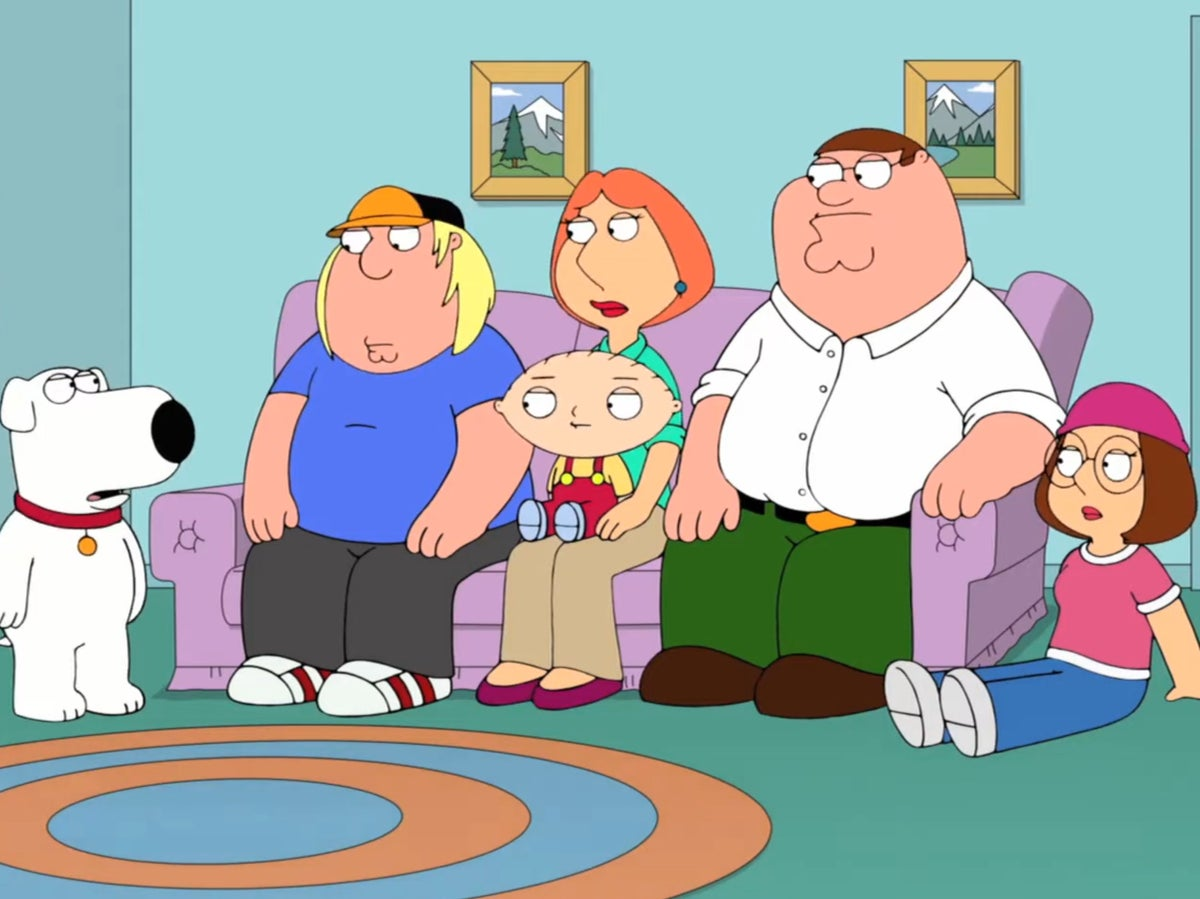

In [ ]:
img

In [ ]:
img_matrix = np.array(img)

In [ ]:
img_matrix.shape

(899, 1200, 3)

In [ ]:
img_matrix

array([[[142, 190, 194],
        [142, 190, 194],
        [142, 190, 194],
        ...,
        [157, 218, 219],
        [157, 218, 219],
        [157, 218, 219]],

       [[142, 190, 194],
        [142, 190, 194],
        [142, 190, 194],
        ...,
        [157, 218, 219],
        [157, 218, 219],
        [157, 218, 219]],

       [[142, 190, 194],
        [142, 190, 194],
        [142, 190, 194],
        ...,
        [158, 218, 219],
        [158, 218, 219],
        [158, 218, 219]],

       ...,

       [[121, 172, 201],
        [121, 172, 201],
        [121, 172, 201],
        ...,
        [ 91, 165, 152],
        [ 91, 165, 152],
        [ 91, 165, 152]],

       [[121, 172, 201],
        [121, 172, 201],
        [121, 172, 201],
        ...,
        [ 91, 165, 152],
        [ 91, 165, 152],
        [ 91, 165, 152]],

       [[121, 172, 201],
        [121, 172, 201],
        [121, 172, 201],
        ...,
        [ 91, 165, 152],
        [ 91, 165, 152],
        [ 91, 165, 152]]

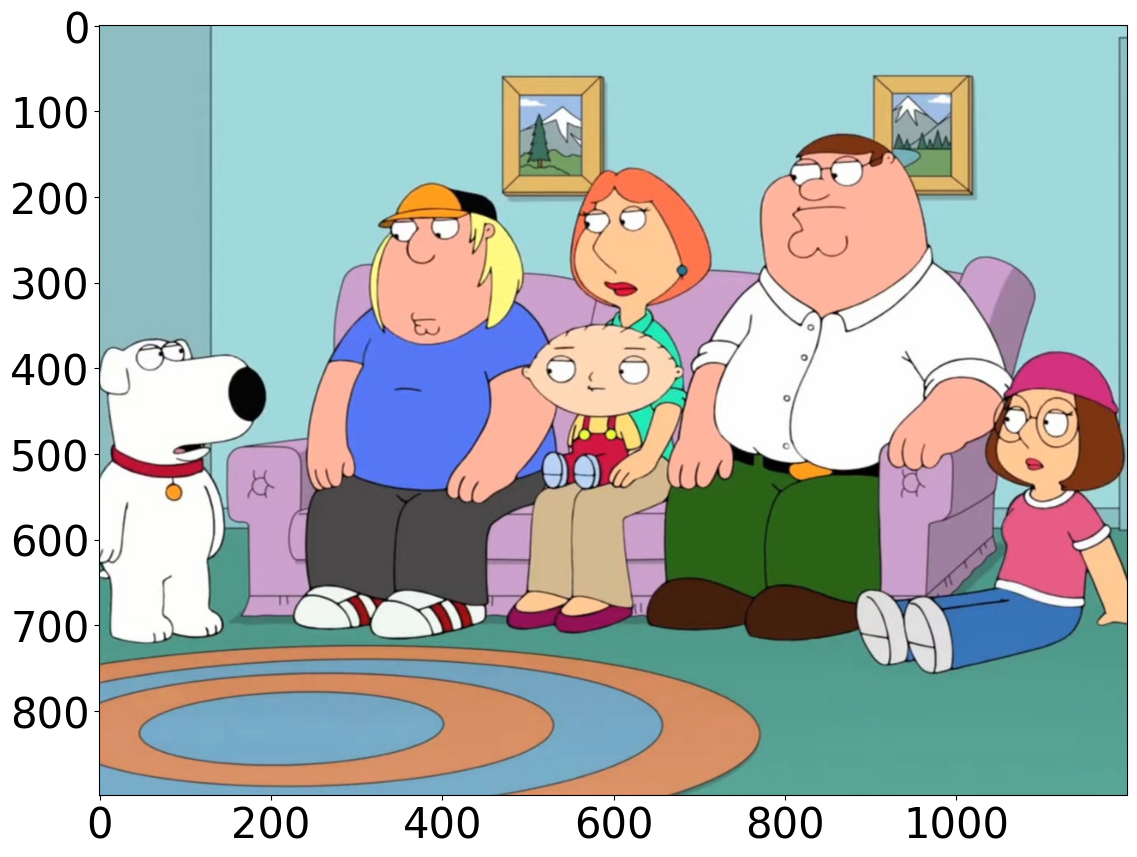

In [ ]:
plt.figure(figsize=(20, 10))

plt.imshow(img_matrix)

plt.show()

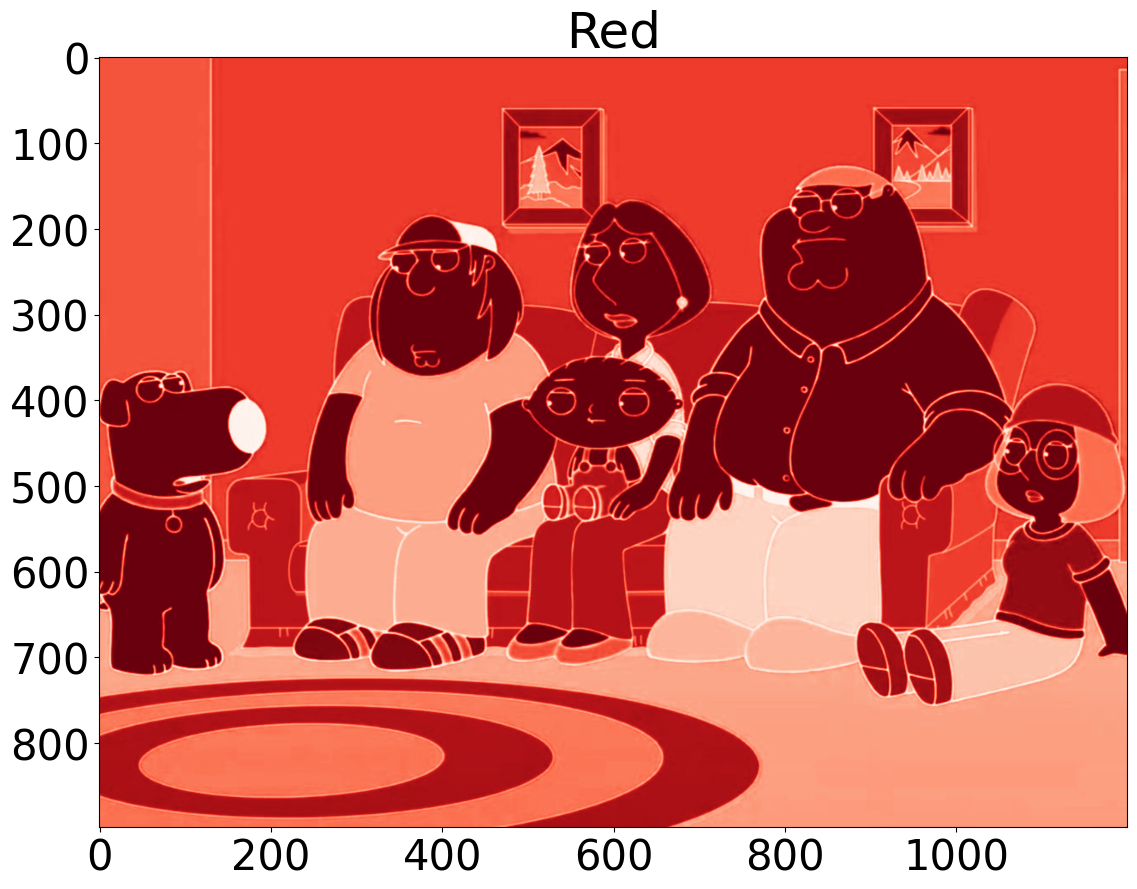

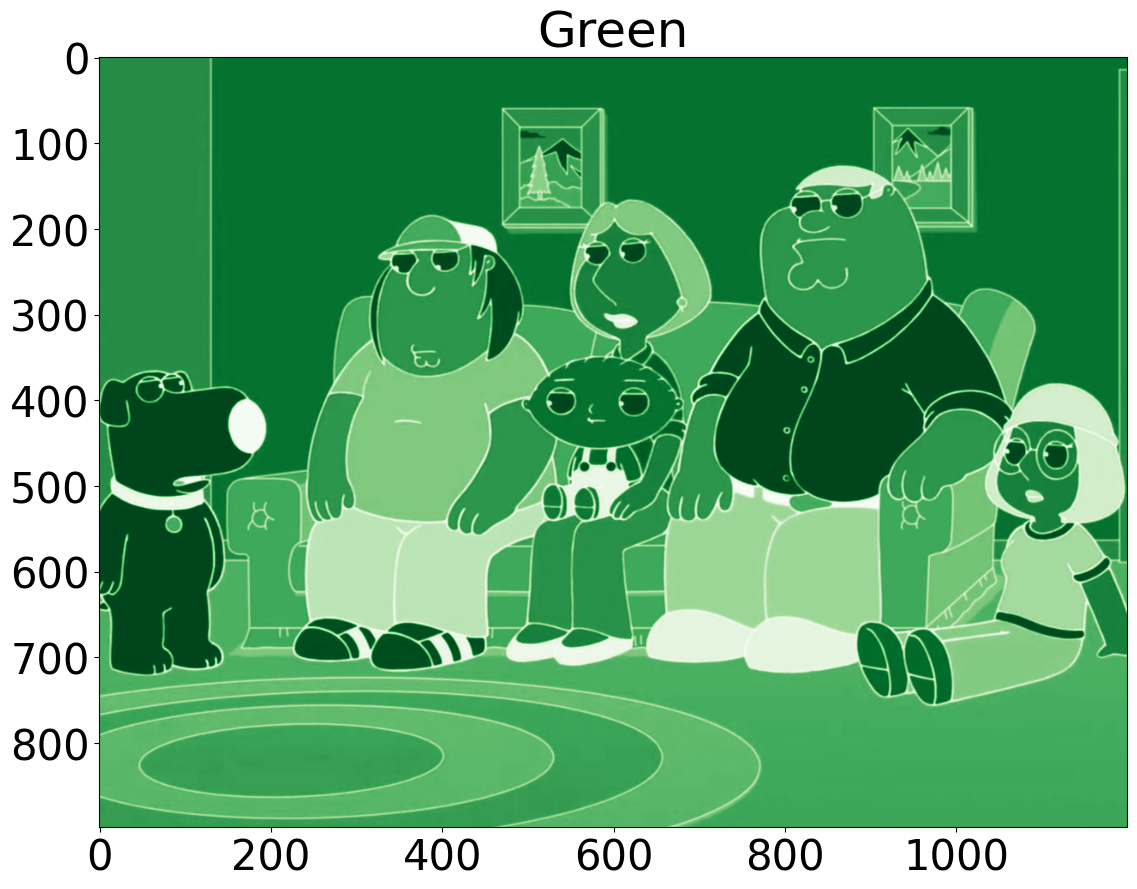

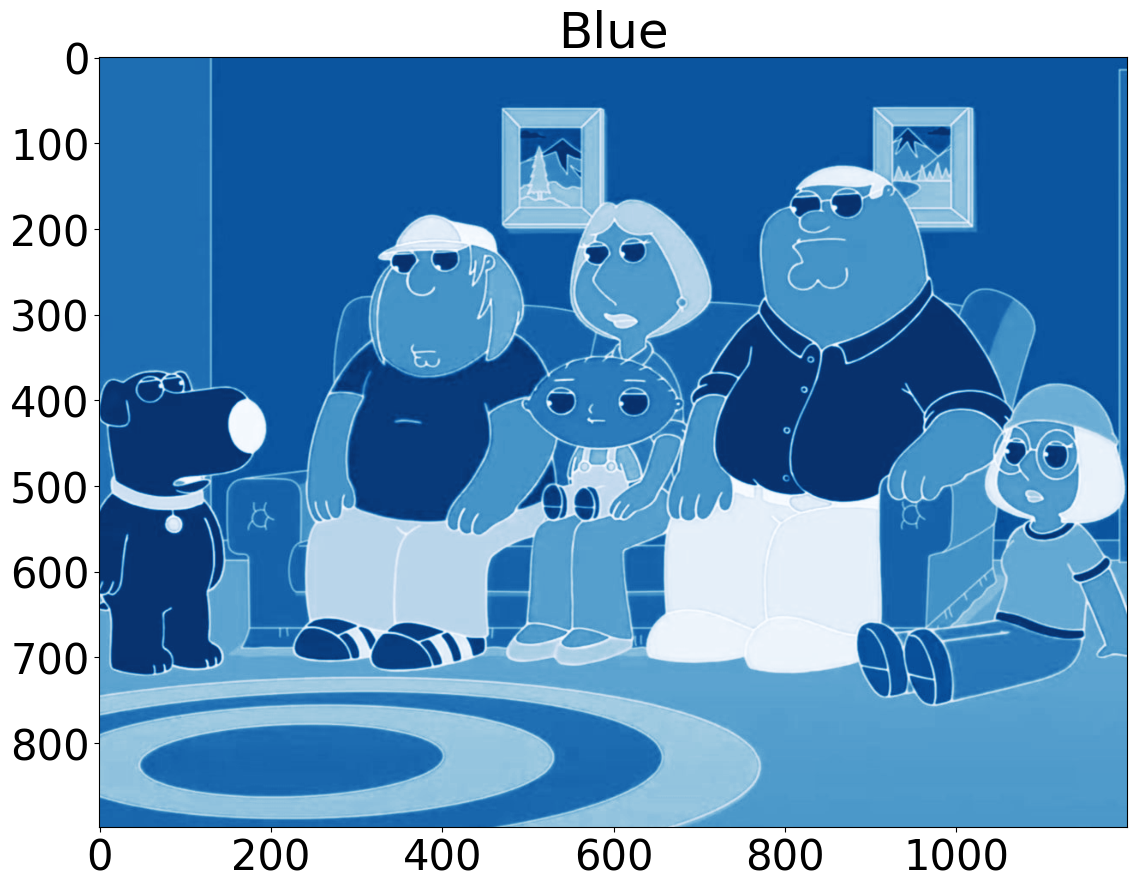

In [ ]:
for i, (cmap, color) in enumerate(
    zip(
        [cm.Reds, cm.Greens, cm.Blues],
        ['Red', 'Green', 'Blue']
    )
):
    plt.figure(figsize=(20, 10))
    plt.imshow(img_matrix[:, :, i], cmap=cmap)
    plt.title(color)
    plt.show()

In [ ]:
img_matrix[:, :, 0].min(), img_matrix[:, :, 0].max()

(0, 255)

In [ ]:
*args
[]
()

SyntaxError: can't use starred expression here (<ipython-input-28-f1ed0c4543ae>, line 1)

### *Дополнительно:* **создание объекта нейронной сети, высокоуровневые API**

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# W x + b

# in_features -> out_features

In [ ]:
net = nn.Sequential(
    nn.Linear(700, 500),
    nn.ReLU(),
    nn.Linear(500, 200),
    nn.ReLU(),
    nn.Linear(200, 10)
)

In [ ]:
net

Sequential(
  (0): Linear(in_features=700, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
net[0]

Linear(in_features=700, out_features=500, bias=True)

In [ ]:
x = torch.rand(1, 700)

net(x)

tensor([[ 0.0792,  0.0498, -0.1008, -0.0157, -0.0048,  0.1533, -0.0993, -0.1652,
          0.0081,  0.0640]], grad_fn=<AddmmBackward0>)

In [ ]:
from collections import OrderedDict

net = nn.Sequential(
    OrderedDict(
        [
            ('linear1', nn.Linear(700, 500)),
            ('relu1', nn.ReLU()),
            ('linear2', nn.Linear(500, 200)),
            ('relu2', nn.ReLU()),
            ('linear3', nn.Linear(200, 10))
        ]
    )
)

In [ ]:
net

Sequential(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=500, out_features=200, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=200, out_features=10, bias=True)
)

In [ ]:
net.linear1

Linear(in_features=700, out_features=500, bias=True)

In [ ]:
input_tensor = torch.rand(6, 700)

net(input_tensor).shape

torch.Size([6, 10])

In [ ]:
# необходимо отнаследоваться от nn.Module и определить методы __init__ и forward

class CustomTaskNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear1 = nn.Linear(700, 500)
        self.linear2 = nn.Linear(500, 500)
        self.linear3 = nn.Linear(500, 10)

        self.activation = nn.ReLU()

    def forward(self, x):
        output = self.activation(self.linear1(x))
        output = self.activation(self.linear2(output))
        output = self.activation(self.linear2(output))
        output = self.linear3(output)

        return output

In [ ]:
net = CustomTaskNetwork()

In [ ]:
net.load_state_dict(torch.load("model.pt"))

FileNotFoundError: [Errno 2] No such file or directory: 'model.pt'

In [ ]:
net(input_tensor).shape

torch.Size([6, 10])

In [ ]:
net.to(torch.device('cuda:0'))

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [ ]:
net.linear1.weight.device

device(type='cuda', index=0)

In [ ]:
net(input_tensor).shape

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
net(input_tensor.cuda()).shape

torch.Size([6, 10])

In [ ]:
net.cpu()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [ ]:
net.train()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [ ]:
net.training

True

In [ ]:
net.eval()

CustomTaskNetwork(
  (linear1): Linear(in_features=700, out_features=500, bias=True)
  (linear2): Linear(in_features=500, out_features=500, bias=True)
  (linear3): Linear(in_features=500, out_features=10, bias=True)
  (activation): ReLU()
)

In [ ]:
net.training

False

In [ ]:
net.linear1.weight

Parameter containing:
tensor([[-0.0364,  0.0240, -0.0370,  ..., -0.0044, -0.0179,  0.0019],
        [-0.0310, -0.0328, -0.0195,  ...,  0.0100, -0.0326,  0.0118],
        [-0.0102,  0.0345,  0.0188,  ..., -0.0119,  0.0157,  0.0204],
        ...,
        [-0.0078,  0.0329, -0.0020,  ..., -0.0234,  0.0288, -0.0338],
        [-0.0071, -0.0215, -0.0270,  ..., -0.0092,  0.0092,  0.0326],
        [-0.0313, -0.0295,  0.0267,  ..., -0.0168, -0.0079, -0.0068]],
       requires_grad=True)

In [ ]:
list(net.parameters())

[Parameter containing:
 tensor([[-0.0364,  0.0240, -0.0370,  ..., -0.0044, -0.0179,  0.0019],
         [-0.0310, -0.0328, -0.0195,  ...,  0.0100, -0.0326,  0.0118],
         [-0.0102,  0.0345,  0.0188,  ..., -0.0119,  0.0157,  0.0204],
         ...,
         [-0.0078,  0.0329, -0.0020,  ..., -0.0234,  0.0288, -0.0338],
         [-0.0071, -0.0215, -0.0270,  ..., -0.0092,  0.0092,  0.0326],
         [-0.0313, -0.0295,  0.0267,  ..., -0.0168, -0.0079, -0.0068]],
        requires_grad=True),
 Parameter containing:
 tensor([ 3.5405e-02, -3.3768e-03,  1.1577e-02, -5.5843e-03,  4.7082e-03,
         -2.9163e-02,  9.9963e-03, -2.9319e-02,  2.4123e-02, -4.1494e-03,
          2.0518e-02,  8.1296e-03, -8.2383e-03,  2.2316e-02, -1.5030e-02,
         -1.3931e-02,  1.7557e-02,  1.4666e-03,  1.6698e-03,  2.0176e-02,
         -5.4463e-03, -2.9842e-02,  2.3404e-02, -3.0165e-02,  2.9500e-02,
          2.6115e-02,  6.7261e-03, -2.5601e-02,  1.1320e-02,  3.6801e-02,
         -2.7223e-02,  2.1478e-02, -3.32

In [ ]:
net.state_dict()

OrderedDict([('linear1.weight',
              tensor([[-0.0364,  0.0240, -0.0370,  ..., -0.0044, -0.0179,  0.0019],
                      [-0.0310, -0.0328, -0.0195,  ...,  0.0100, -0.0326,  0.0118],
                      [-0.0102,  0.0345,  0.0188,  ..., -0.0119,  0.0157,  0.0204],
                      ...,
                      [-0.0078,  0.0329, -0.0020,  ..., -0.0234,  0.0288, -0.0338],
                      [-0.0071, -0.0215, -0.0270,  ..., -0.0092,  0.0092,  0.0326],
                      [-0.0313, -0.0295,  0.0267,  ..., -0.0168, -0.0079, -0.0068]])),
             ('linear1.bias',
              tensor([ 3.5405e-02, -3.3768e-03,  1.1577e-02, -5.5843e-03,  4.7082e-03,
                      -2.9163e-02,  9.9963e-03, -2.9319e-02,  2.4123e-02, -4.1494e-03,
                       2.0518e-02,  8.1296e-03, -8.2383e-03,  2.2316e-02, -1.5030e-02,
                      -1.3931e-02,  1.7557e-02,  1.4666e-03,  1.6698e-03,  2.0176e-02,
                      -5.4463e-03, -2.9842e-02,  2.3404e

In [ ]:
torch.save(net.state_dict(), 'model.pt')

In [ ]:
torch.load('model.pt')

OrderedDict([('linear1.weight',
              tensor([[-0.0364,  0.0240, -0.0370,  ..., -0.0044, -0.0179,  0.0019],
                      [-0.0310, -0.0328, -0.0195,  ...,  0.0100, -0.0326,  0.0118],
                      [-0.0102,  0.0345,  0.0188,  ..., -0.0119,  0.0157,  0.0204],
                      ...,
                      [-0.0078,  0.0329, -0.0020,  ..., -0.0234,  0.0288, -0.0338],
                      [-0.0071, -0.0215, -0.0270,  ..., -0.0092,  0.0092,  0.0326],
                      [-0.0313, -0.0295,  0.0267,  ..., -0.0168, -0.0079, -0.0068]])),
             ('linear1.bias',
              tensor([ 3.5405e-02, -3.3768e-03,  1.1577e-02, -5.5843e-03,  4.7082e-03,
                      -2.9163e-02,  9.9963e-03, -2.9319e-02,  2.4123e-02, -4.1494e-03,
                       2.0518e-02,  8.1296e-03, -8.2383e-03,  2.2316e-02, -1.5030e-02,
                      -1.3931e-02,  1.7557e-02,  1.4666e-03,  1.6698e-03,  2.0176e-02,
                      -5.4463e-03, -2.9842e-02,  2.3404e

In [ ]:
net.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [ ]:
torch.save(torch.rand(100, 100), "tensor.pt")

In [ ]:
! ls -la

total 2544
drwxr-xr-x 1 root root    4096 Mar  6 06:30 .
drwxr-xr-x 1 root root    4096 Mar  6 06:18 ..
drwxr-xr-x 4 root root    4096 Mar  4 14:27 .config
-rw-r--r-- 1 root root 2426420 Mar  6 06:30 model.pt
-rw-r--r-- 1 root root  112326 Mar  6 06:19 peter.jpg
drwxr-xr-x 1 root root    4096 Mar  4 14:28 sample_data
-rw-r--r-- 1 root root   41111 Mar  6 06:30 tensor.pt


In [ ]:
torch.load("tensor.pt")

tensor([[0.7866, 0.9110, 0.3155,  ..., 0.8473, 0.6868, 0.0839],
        [0.7964, 0.2658, 0.4024,  ..., 0.8912, 0.6635, 0.5404],
        [0.7558, 0.4545, 0.0943,  ..., 0.7006, 0.5727, 0.6151],
        ...,
        [0.3040, 0.0284, 0.9428,  ..., 0.6651, 0.2109, 0.2365],
        [0.1394, 0.8548, 0.1675,  ..., 0.4857, 0.5075, 0.6935],
        [0.8224, 0.4429, 0.1580,  ..., 0.8457, 0.3496, 0.8450]])

### [**Optimizer**](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#optimizer)
*(оптимизаторы)*

*See* https://pytorch.org/docs/stable/optim.html

In [ ]:
from torch import optim

In [ ]:
optim.SGD, optim.Adam

(torch.optim.sgd.SGD, torch.optim.adam.Adam)

In [ ]:
optimizer = optim.Adam(net.parameters(), betas=(0.9, 0.999), lr=1e-3)

In [ ]:
for param in parameters:
    param = param - param.grad * self.lr

In [ ]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [ ]:
optimizer = optim.SGD(
    [
        {'params': net.linear1.parameters()},
        {'params': net.linear2.parameters(), 'lr': 1e-3}
    ],
    lr=1e-2,
    momentum=0.9
)

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)

In [ ]:
optimizer.step()

In [ ]:
optimizer.zero_grad(set_to_none=True)

### [**Loss**](https://pytorch.org/docs/stable/nn.html#loss-functions)
(функционалы ошибки)

In [ ]:
nn.L1Loss, nn.MSELoss, nn.CrossEntropyLoss, nn.NLLLoss

(torch.nn.modules.loss.L1Loss,
 torch.nn.modules.loss.MSELoss,
 torch.nn.modules.loss.CrossEntropyLoss,
 torch.nn.modules.loss.NLLLoss)

In [ ]:
loss = nn.MSELoss()

In [ ]:
loss

MSELoss()

In [ ]:
x = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)

print(x)
print()
print(target)

tensor([[ 1.1319, -0.3938, -0.5363,  1.5800, -0.1629],
        [ 2.0258, -2.0899, -1.0620, -1.4276,  1.3544],
        [ 0.0182,  1.0396,  1.2715,  1.5981, -0.2626]], requires_grad=True)

tensor([[-0.7414, -0.4341, -1.3592,  1.3781, -1.0189],
        [-1.6599,  0.1574,  0.4352,  2.1456, -0.1362],
        [ 1.2608, -0.1488, -0.1880, -1.7780,  0.4526]])


In [ ]:
output = loss(x, target)
print(output)

tensor(3.8550, grad_fn=<MseLossBackward0>)


In [ ]:
output.backward()

In [ ]:
output

tensor(3.8550, grad_fn=<MseLossBackward0>)

In [ ]:
grad_fn


NameError: name 'grad_fn' is not defined

In [ ]:
x.grad

tensor([[-0.1915, -0.3256, -0.3452,  0.4077, -0.0965],
        [ 0.0080, -0.2400, -0.1864, -0.0920, -0.0071],
        [-0.0399,  0.1643, -0.2740,  0.2657, -0.1392]])

In [ ]:
loss = nn.CrossEntropyLoss()

x = torch.randn(3, 5, requires_grad=True)
y = torch.empty(3, dtype=torch.long).random_(5)

x, y

(tensor([[ 0.0833, -0.0875, -1.2107,  1.4702, -1.7268],
         [-0.3889, -0.3152,  0.1784, -2.0484,  1.5957],
         [-0.4154, -0.3775,  1.1265, -0.5106,  0.3695]], requires_grad=True),
 tensor([4, 0, 4]))

In [ ]:
loss(x, y)

tensor(2.5241, grad_fn=<NllLossBackward0>)

### *Дополнительно:* [**начальная инициализация весов**](https://education.yandex.ru/handbook/ml/article/tonkosti-obucheniya#iniczializiruem-pravilno)

* `x.zero_()`

 *Инициализирует тензор нулями. Не имеет immutable варианта.*

* `x.fill_(n)`

 *Заполняет тензор константой n. Аналогично не имеет immutable варианта.*

\\

 *See* [Xavier Glorot, Yoshua Bengio: **Understanding the difficulty of training deep feedforward neural network**](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

* `x.random_(from, to)`

 Заполняет тензор сэмплами из дискретного (даже для вещественнозначных тензоров) равномерного распределения.

* `x.uniform_(from=0, to=1)`

  *Тоже равномерное распределение, но уже непрерывное и с более привычными границами по-умолчанию. Доступно только для вещественнозначных тензоров.*

***Если from и to не указаны, то они приравниваются нижней и верхней границам используемого типа данных соответственно.***

\\

See [Kaiming He, Xiangyu Zhang, Shaoqing Ren и Jian Sun: **Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification**](https://arxiv.org/abs/1502.01852v1)

* **`x.normal_(mean=0, std=1)`**

  *Нормальное распределение. Доступно только для вещественнозначных тензоров.*
  
  \\

* **`x.bernoulli_(p=0.5)`**

  *Распределение Бернулли. В качестве p может использоваться скаляр либо тензор той же размерности со значениями 0 <= p <= 1. Важно отличать эту версию от immutable варианта, так как он имеет другую семантику. Вызов y = x.bernoulli() эквивалентен y.bernoulli_(x), т.е. x здесь сам используется как тензор параметров распределения.*

* **`torch.eye(n, m)`**

  *Создаёт единичную матрицу n x m. Здесь по неясным для меня причинам не существует уже inplace варианта.*

### *Дополнительно: общая структура обучения модели*

In [ ]:
model.train()

for x, y in dataloader:
    optimizer.zero_grad()

    output = model(x)

    loss = loss_fn(output, y)

    loss.backward()

    optimizer.step()

In [ ]:
from tqdm import tqdm

In [ ]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer


def train(model: nn.Module, data_loader: DataLoader, optimizer: Optimizer, loss_fn):
    model.train()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader)):
        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.item()

        optimizer.step()

    return total_loss / len(data_loader)


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def evaluate(model: nn.Module, data_loader: DataLoader, loss_fn):
    model.eval()

    total_loss = 0

    for i, (x, y) in enumerate(tqdm(data_loader)):
        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

    return total_loss / len(data_loader)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style='darkgrid')


def plot_stats(
    train_loss: list[float],
    valid_loss: list[float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')

    plt.legend()

    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    plt.show()

In [ ]:
from IPython.display import clear_output


def fit(model, train_loader, valid_loader, optimizer, loss_fn, num_epochs, title):
    train_loss_history, valid_loss_history = [], []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, optimizer, loss_fn)
        valid_loss = evaluate(model, valid_loader, loss_fn)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        clear_output()

        plot_stats(train_loss_history, valid_loss_history, title)

### Обучение первой нейросети в `PyTorch`

In [ ]:
class CustomTaskNetwork(nn.Module):
    def __init__(self):
#        super().__init__()

        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x)


model = CustomTaskNetwork()

optimizer = optim.Adam(model.parameters(), lr=1e-2)

loss_fn = nn.MSELoss()

NameError: name 'nn' is not defined

In [ ]:
from torch.utils.data import random_split


dataset = TensorDataset(X, Y)

train_dataset, valid_dataset = random_split(
    dataset,
    (int(len(dataset) * 0.8), len(dataset) -  int(len(dataset) * 0.8)),
    generator=torch.Generator().manual_seed(300)
)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=10, shuffle=False)

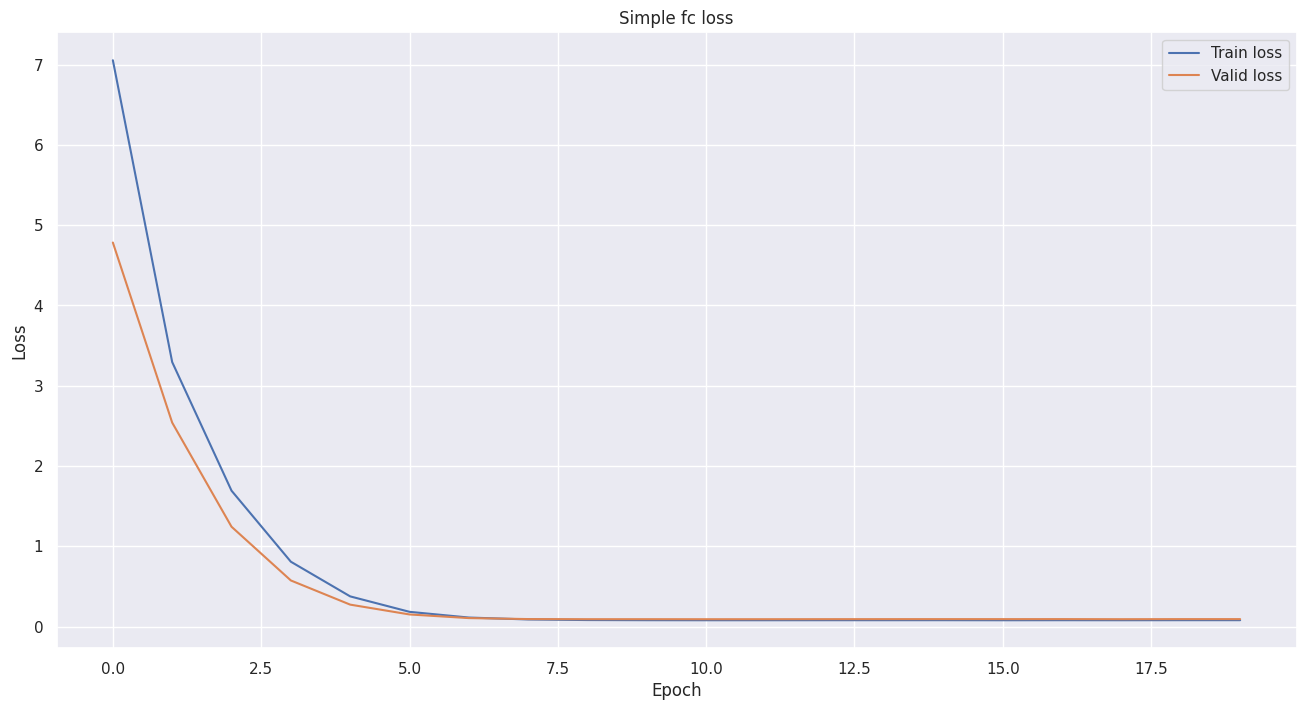

In [ ]:
fit(model, train_loader, valid_loader, optimizer, loss_fn, 20, 'Simple fc')

### BatchNorm и Dropout

In [ ]:
dropout = nn.Dropout(p=0.1)

dropout

Dropout(p=0.1, inplace=False)

In [ ]:
x = torch.rand(3, 7)

x

tensor([[0.4857, 0.9035, 0.1018, 0.2132, 0.3809, 0.0729, 0.1050],
        [0.8425, 0.5233, 0.0978, 0.4174, 0.4836, 0.3222, 0.0818],
        [0.7721, 0.4382, 0.9882, 0.1171, 0.2255, 0.4740, 0.1518]])

In [ ]:
x / 0.9

tensor([[0.5397, 1.0039, 0.1132, 0.2369, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.2506, 0.5267, 0.1687]])

In [ ]:
dropout.train()

for _ in range(3):
    print(dropout(x))

tensor([[0.5397, 1.0039, 0.1132, 0.2369, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.2506, 0.5267, 0.1687]])
tensor([[0.0000, 1.0039, 0.1132, 0.2369, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.2506, 0.5267, 0.1687]])
tensor([[0.5397, 1.0039, 0.1132, 0.0000, 0.4232, 0.0810, 0.1166],
        [0.9361, 0.5815, 0.1086, 0.4638, 0.5373, 0.3580, 0.0909],
        [0.8579, 0.4869, 1.0980, 0.1301, 0.0000, 0.5267, 0.0000]])


In [ ]:
dropout.eval()

dropout(x)

tensor([[0.4857, 0.9035, 0.1018, 0.2132, 0.3809, 0.0729, 0.1050],
        [0.8425, 0.5233, 0.0978, 0.4174, 0.4836, 0.3222, 0.0818],
        [0.7721, 0.4382, 0.9882, 0.1171, 0.2255, 0.4740, 0.1518]])

In [ ]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm

BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
x = torch.rand(3, 7)

x

tensor([[0.1844, 0.8558, 0.8472, 0.3011, 0.5549, 0.7383, 0.8578],
        [0.0330, 0.9978, 0.3743, 0.7037, 0.1895, 0.1152, 0.1614],
        [0.7947, 0.2534, 0.7907, 0.6512, 0.6989, 0.3888, 0.3418]])

In [ ]:
batch_norm(x)

tensor([[-0.4646,  0.4755,  0.8368, -1.4038,  0.3441,  1.2712,  1.3694],
        [-0.9244,  0.9156, -1.4056,  0.8489, -1.3599, -1.1720, -0.9904],
        [ 1.3890, -1.3911,  0.5688,  0.5548,  1.0157, -0.0992, -0.3789]],
       grad_fn=<NativeBatchNormBackward0>)

In [ ]:
batch_norm.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1.], requires_grad=True)

In [ ]:
batch_norm.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [ ]:
batch_norm.running_mean

tensor([0., 0., 0., 0., 0., 0., 0.])

In [ ]:
batch_norm.running_var

tensor([1., 1., 1., 1., 1., 1., 1.])

In [ ]:
batch_norm.num_batches_tracked

tensor(0)

In [ ]:
batch_norm(x)

batch_norm.num_batches_tracked

tensor(2)

In [ ]:
batch_norm.eval()

batch_norm(x)

tensor([[0.1844, 0.8557, 0.8472, 0.3011, 0.5549, 0.7383, 0.8578],
        [0.0330, 0.9978, 0.3743, 0.7037, 0.1895, 0.1152, 0.1614],
        [0.7947, 0.2534, 0.7907, 0.6512, 0.6989, 0.3888, 0.3418]],
       grad_fn=<NativeBatchNormBackward0>)

In [ ]:
x

tensor([[0.1844, 0.8558, 0.8472, 0.3011, 0.5549, 0.7383, 0.8578],
        [0.0330, 0.9978, 0.3743, 0.7037, 0.1895, 0.1152, 0.1614],
        [0.7947, 0.2534, 0.7907, 0.6512, 0.6989, 0.3888, 0.3418]])

In [ ]:
batch_norm = nn.BatchNorm1d(num_features=7)

batch_norm.eval()

batch_norm(x)

### Dataset & DataLoader

See https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

MNIST dataset

See https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

In [ ]:
from torchvision import datasets

mnist = datasets.MNIST(root='mnist', download=True)

mnist

100%|██████████| 9912422/9912422 [00:00<00:00, 91750054.05it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 23526062.11it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24480858.18it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12459469.44it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist
    Split: Train

In [ ]:
mnist[10]

(<PIL.Image.Image image mode=L size=28x28>, 3)

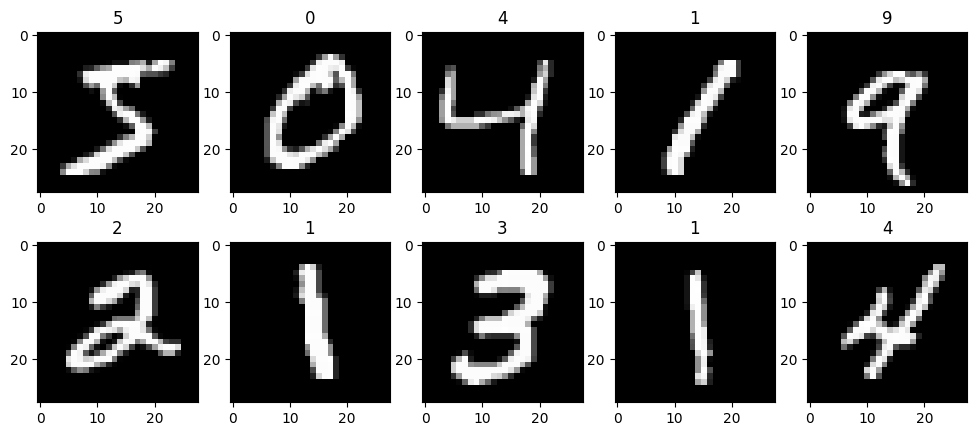

In [ ]:
plt.figure(figsize=(12,5))

for i in range(10):
    x, y = mnist[i]
    plt.subplot(2, 5, i + 1)
    plt.title(f'{y}')
    plt.imshow(x, cmap='gray')

plt.show()

 Custom dataset

In [ ]:
from torch.utils.data import Dataset

class RandomDataset(Dataset):
    def __init__(self, n_objects, n_features):
        # your code here
        self.X = torch.rand(n_objects, n_features)
        self.y = torch.rand(n_objects)

    def __len__(self):
        # your code here
        return len(self.X)

    def __getitem__(self, idx):
        # your code here
        return self.X[idx], self.y[idx]

In [ ]:
data = RandomDataset(100, 5)

x, y = data[0]

print(f'x = {x}')
print(f'y = {y}')

x = tensor([0.1866, 0.6735, 0.9057, 0.7833, 0.5013])
y = 0.37337547540664673


Dataloader

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(data, batch_size=50, shuffle=True)

for i, (X, y) in enumerate(dataloader):
    print(f'Batch {i}')
    print(f'X.shape = {X.shape}')
    print(f'y.shape = {y.shape}')

Batch 0
X.shape = torch.Size([50, 5])
y.shape = torch.Size([50])
Batch 1
X.shape = torch.Size([50, 5])
y.shape = torch.Size([50])


### Neural Networks

#### *Генерируем датасет*

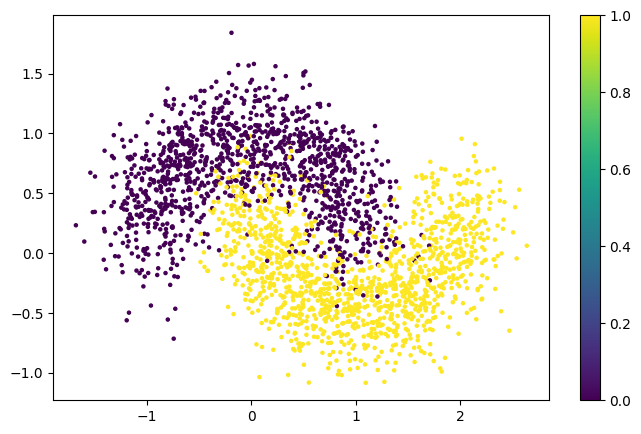

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

X, y = make_moons(10000, noise=0.25, random_state=12)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = torch.from_numpy(X_train).to(dtype=torch.float)
y_train = torch.from_numpy(y_train).to(dtype=torch.float)
X_test = torch.from_numpy(X_test).to(dtype=torch.float)
y_test = torch.from_numpy(y_test).to(dtype=torch.float)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

plt.figure(figsize=(8,5))

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=5)
plt.colorbar()

plt.show()

**Вопрос:** Почему нам не хватит линейной модели для решения задачи?

#### *Собираем модель*

See https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html \
See https://pytorch.org/docs/stable/nn.html

In [ ]:
from torch import nn

# your code here
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=1),
    nn.Sigmoid(),
    nn.Flatten(start_dim=0)
)

model

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
  (6): Flatten(start_dim=0, end_dim=-1)
)

In [ ]:
# model should predict in [0,1)
with torch.no_grad():
    x, y = train_dataset[0]
    print(f'x = {x}')
    print(f'y_true = {y}')
    print(f'y_pred = {model(x).item()}')

x = tensor([-0.4311,  0.5937])
y_true = 0.0
y_pred = 0.44110390543937683


**Вопрос:** Сколько всего параметров в модели? Почему столько?

In [ ]:
# check model parameters
params_count = 0
for param in model.parameters():
    params_count += torch.numel(param)
params_count

151

#### *Обучаем модель*

See https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

##### Выбираем лосс функцию
See https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
# your code here
loss_function = nn.BCELoss()

##### Выбираем оптимизатор

In [ ]:
from torch import optim

# your code here
optimizer = optim.SGD(model.parameters(), lr=1e-1)

##### Запускаем тренировочный цикл

In [ ]:
def run(model, dataloader, loss_function, optimizer=None):
    # set the model to evaluation or training mode
    if optimizer == None:
        model.eval()
    else:
        model.train()

    total_loss = 0

    for X, y in dataloader:
        # compute prediction
        pred = model(X)
        # compute loss
        loss = loss_function(pred, y)
        # save loss
        total_loss += loss.item()
        if optimizer != None:
            # compute gradients
            loss.backward()
            # do optimizer step
            optimizer.step()
            # clear gradients
            optimizer.zero_grad()

    return total_loss / len(dataloader)

In [ ]:
from IPython.display import clear_output

def show_losses(train_loss_hist, test_loss_hist):
    clear_output()

    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.title('Train Loss')
    plt.plot(np.arange(len(train_loss_hist)), train_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.title('Test Loss')
    plt.plot(np.arange(len(test_loss_hist)), test_loss_hist)
    plt.yscale('log')
    plt.grid()

    plt.show()

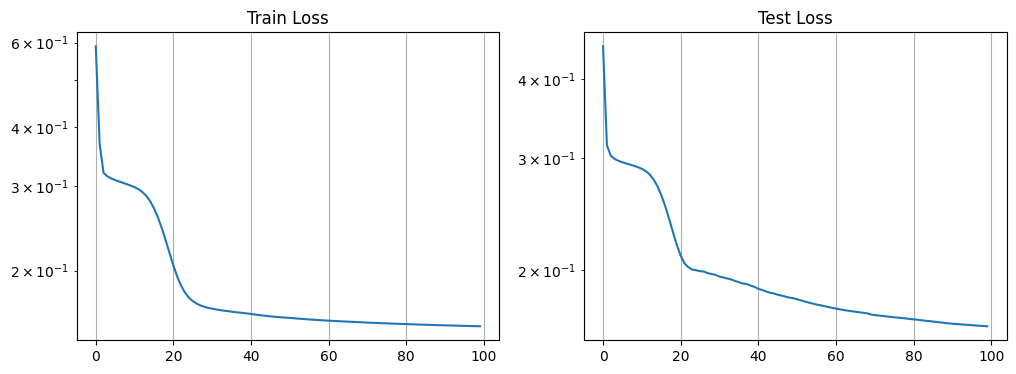

In [ ]:
BATCH_SIZE = 100
NUM_EPOCHS = 100

# your code here
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

train_loss_hist = []
test_loss_hist = []

for i in range(NUM_EPOCHS):
    train_loss = run(model, train_loader, loss_function, optimizer)
    train_loss_hist.append(train_loss)
    test_loss = run(model, test_loader, loss_function)
    test_loss_hist.append(test_loss)

    if i % 10 == 9:
        show_losses(train_loss_hist, test_loss_hist)

#### Смотрим результаты

In [ ]:
def make_levels(x_grid, y_grid, func, num_levels=10):
    X, Y = torch.meshgrid(x_grid, y_grid)
    Z = torch.empty_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = func(torch.tensor([X[i, j], Y[i, j]]))
    levels = torch.linspace(torch.min(Z), torch.max(Z), steps=num_levels)
    return X, Y, Z, levels

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


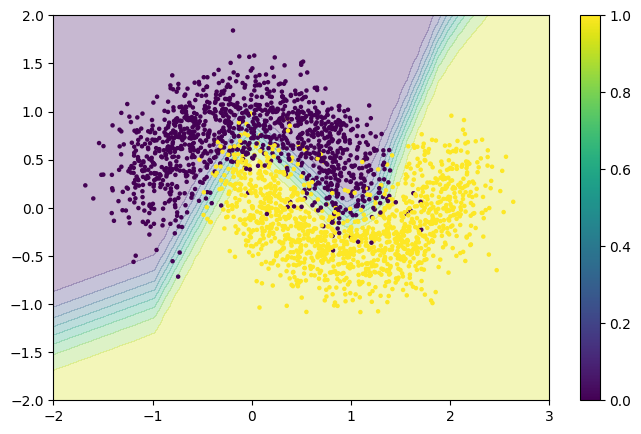

In [ ]:
model.eval()

plt.figure(figsize=(8,5))

levels = make_levels(torch.linspace(-2, 3, 50), torch.linspace(-2, 2, 50), lambda x: model(x).item())

plt.contourf(*levels, alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=5)
plt.colorbar()

plt.show()

## *PS: важные замечания*

### MNIST - многоклассовая классификация

Возможно, пригодится *one-hot encoding*

See https://pytorch.org/docs/stable/generated/torch.nn.functional.one_hot.html

Лосс-функция `BCELoss` не подойдет, стоит поискать подходящую

See https://pytorch.org/docs/stable/nn.html#loss-functions

### Объекты MNIST - картинки (PIL.Image)

Стоит обратить внимание на параметр transform датасета MNIST - с его помощью сразу преобразовать объекты выборки

See https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST \
See https://pytorch.org/vision/master/generated/torchvision.transforms.ToTensor.html

Объекты MNIST двумерные, стоит это учесть при разработке архитектуры модели

See https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html

Возможно, пригодятся модули `nn.Dropout` и `nn.BatchNorm`

See https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html \
See https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html